In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
import gc
warnings.filterwarnings('ignore')
gc.disable()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from copy import deepcopy,copy
from ipywidgets import IntProgress
from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os
from sympy import sympify,latex,Float,simplify
import random
from math import ceil,sqrt
import seaborn as sbrn
from scipy.optimize import curve_fit
import pynumdiff
# Catch stout
from io import StringIO 
import sys
from contextlib import redirect_stdout
import re
from sympy import latex, sympify,init_printing
import traceback
# Since the 'user' column do not have relevant information will not be read

# Import Machine Scientist
from importlib.machinery import SourceFileLoader
path = '/export/home/oriolca/BMS_ODE/Bacteries/rguimera-machine-scientist-linear-term/machinescientist_ode.py'
ms = SourceFileLoader('ms', path).load_module()

"""cols=['A3','A6','A7','A8','A9',
      'B4','B5','B6','B8','B9','B11','B12',
      'C1','C2','C3','C5','C7','C11','C12',
      'D2','D5','D6','D7','D8','D9','D12',
      'E3','E5','E12',
      'F2','F3','F7','F10',
      'G3','G6','G7','G8','G9',
      'H1','H2','H3','H4','H5','H6','H8','H10','H12']"""

2025-03-13 09:51:38,496 [INFO] 
Limited Total Variation Regularization Support Detected! 
---> CVXPY is not installed. 
---> Many Total Variation Methods require CVXPY including: 
---> velocity, acceleration, jerk, jerk_sliding, smooth_acceleration
---> Please install CVXPY to use these methods.
---> Recommended to also install MOSEK and obtain a MOSEK license.
You can still use: total_variation_regularization.iterative_velocity

2025-03-13 09:51:38,498 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 

2025-03-13 09:51:38,498 [INFO] 
Limited Linear Model Support Detected! 
---> CVXPY is not installed. 
---> Install CVXPY to use lineardiff derivatives 
You can still use other methods 



"cols=['A3','A6','A7','A8','A9',\n      'B4','B5','B6','B8','B9','B11','B12',\n      'C1','C2','C3','C5','C7','C11','C12',\n      'D2','D5','D6','D7','D8','D9','D12',\n      'E3','E5','E12',\n      'F2','F3','F7','F10',\n      'G3','G6','G7','G8','G9',\n      'H1','H2','H3','H4','H5','H6','H8','H10','H12']"

# Read model
f_name='res_bact_growth2023_09_22-04_17_28'
#file = open(f'./{f_name}/model_mdl.pkl','rb')
file = open(f'./{f_name}/model_mdl.pkl','rb')
bms_models = pickle.load(file)
file.close()
file = open(f'./{f_name}/x.pkl','rb')
x = pickle.load(file)
file.close()
file = open(f'./{f_name}/y.pkl','rb')
y = pickle.load(file)
file.close()

old_model=deepcopy(bms_models)
old_srt=str(bms_models)
old_pars=bms_models.par_values
old_model.get_sse(fit=True)
print(str(bms_models))
print(bms_models.E)
print(str(bms_models.par_values['A3']))
print(bms_models.y['A3'][:5])

((B * (B * _a6_)) + (B / _a0_))
-13121.4564012814
((B * (B * _a6_)) + (B / _a0_))


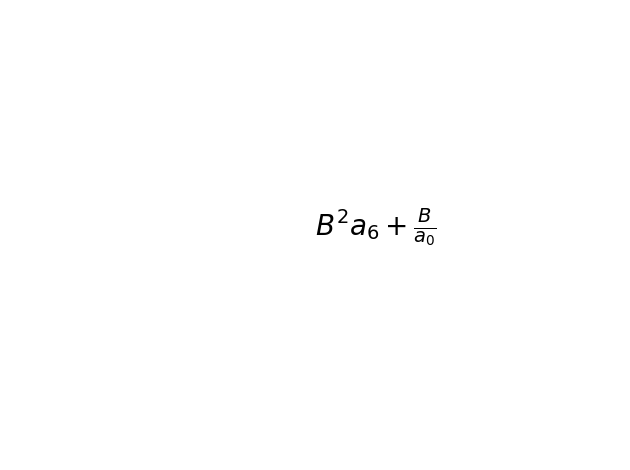

((B ** _a7_) / _a4_)
-12549.8333256624
((_a0_ * B) + ((B ** _a7_) / _a4_))


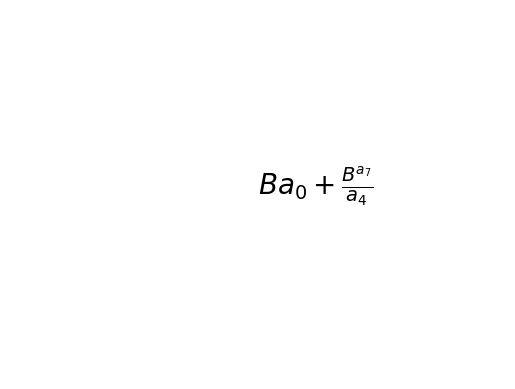

((B ** -((_a0_ * _a3_))) + _a6_)
-14223.2950981405
((_a0_ * B) * ((B ** -((_a0_ * _a3_))) + _a6_))


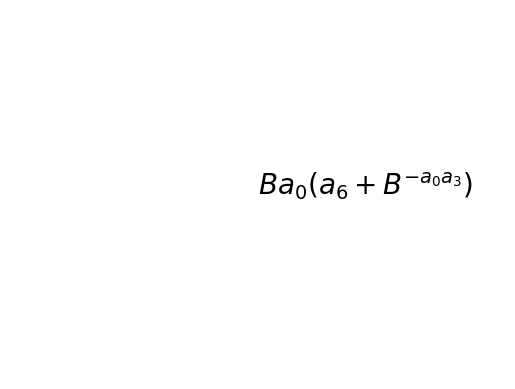

In [10]:
# Read model
#f_name='res_bact_growth2023_09_22-04_17_28'
#f_name='res_bact_growth2023_10_05-12_22_39'
#file = open(f'./{f_name}/model_mdl.pkl','rb')
#file = open(f'./{f_name}/model_mdl.pkl','rb')
#f_name='res_bact_growth2023_10_09-05_37_07'
#file = open(f'./{f_name}/expr_52.pkl','rb')

f_name='Train_test_data_lin_term_com2025_03_11-11_21_44/'
file = open(f'./{f_name}/x.pkl','rb')
x = pickle.load(file)
file.close()
file = open(f'./{f_name}/y.pkl','rb')
y = pickle.load(file)
file.close()

f_name='Full_data_free_model2025_03_11-11_23_23//'
try:
    file = open(f'./{f_name}model_mdl.pkl','rb')
except:
    file = open(f'./{f_name}mdl.pkl','rb')
bms_free = pickle.load(file)
file.close()
print(str(bms_free))
print(bms_free.E)
expr = f'{bms_free}'
print(expr)
new_expr_free = latex(sympify(re.sub(r'_a(\d+)_', r'a_\1', expr)))
plt.text(0.5,0.5,f'${new_expr_free}$',fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

###################################################################

f_name='Full_data_lin_term_com_2025_03_11-11_22_54/'
try:
    file = open(f'./{f_name}model_mdl.pkl','rb')
except:
    file = open(f'./{f_name}mdl.pkl','rb')
bms_lin_comb = pickle.load(file)
file.close()
print(str(bms_lin_comb))
print(bms_lin_comb.E)
expr = f'{bms_lin_comb.constraint[0]}{bms_lin_comb}{bms_lin_comb.constraint[1]}'
print(expr)
new_expr_lin_comb = latex(sympify(re.sub(r'_a(\d+)_', r'a_\1', expr)))
plt.text(0.5,0.5,f'${new_expr_lin_comb}$',fontsize=20)
plt.axis('off')
plt.show()

####################################################################

f_name='Full_data_lin_term_prod_2025_03_11-11_22_27/'
try:
    file = open(f'./{f_name}model_mdl.pkl','rb')
except:
    file = open(f'./{f_name}mdl.pkl','rb')
bms_lin_prod = pickle.load(file)
file.close()
print(str(bms_lin_prod))
print(bms_lin_prod.E)
expr = f'{bms_lin_prod.constraint[0]}{bms_lin_prod}{bms_lin_prod.constraint[1]}'
print(expr)
new_expr_prod = latex(sympify(re.sub(r'_a(\d+)_', r'a_\1', expr)))
plt.text(0.5,0.5,f'${new_expr_prod}$',fontsize=20)
plt.axis('off')
plt.show()

In [3]:
cols=list(x.keys())
print(len(cols))
dy_num={}
dy_smth={}
for col in cols:
    B=x[col].B.values
    # 3point
    h=x[col].t[1]-x[col].t[0]
    dy_num[col]=pd.Series([(B[1]-B[0])/h]+[(B[i+1]-B[i-1])/(2.*h) for i in range(1,len(B)-1)]+[(B[len(B)-1]-B[len(B)-2])/h])
    
    par = [2,21,21]
    
    x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x[col].B.to_numpy(), h, par, options=None)
    dy_smth[col]=pd.Series(dxdt_hat)

66


In [4]:
predictions_free=bms_free.predict(x)

predictions_lin_comb=bms_lin_comb.predict(x)

predictions_lin_prod=bms_lin_prod.predict(x)


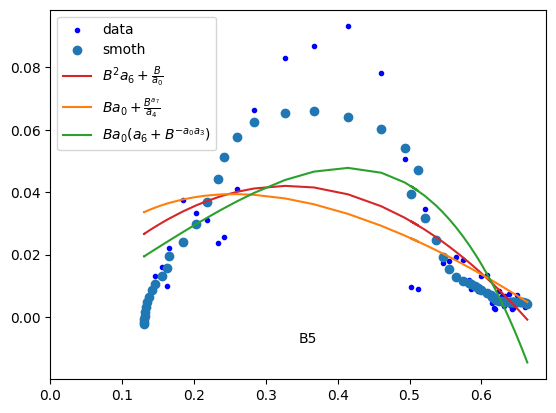

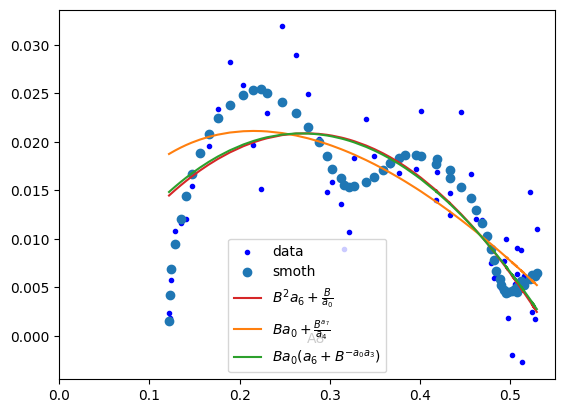

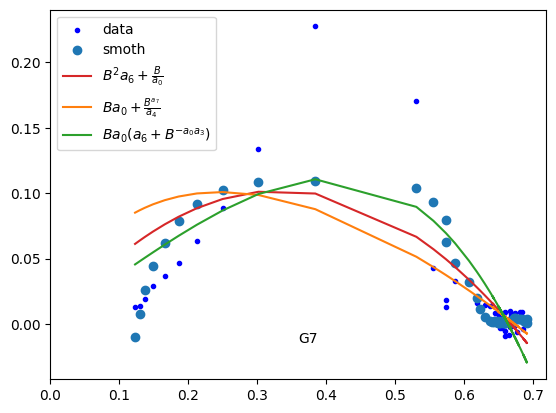

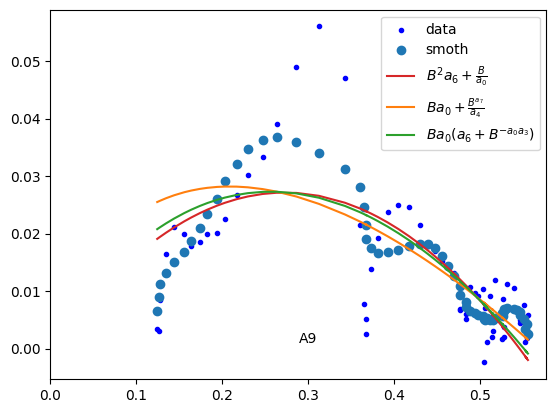

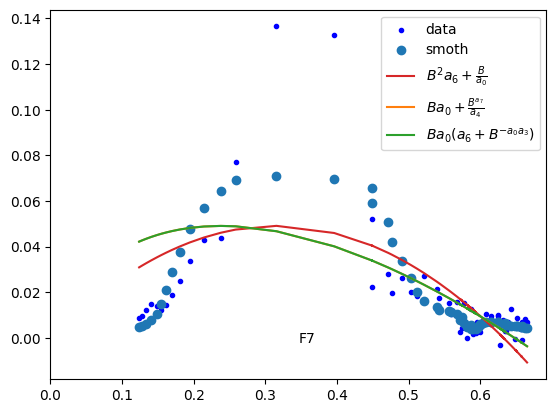

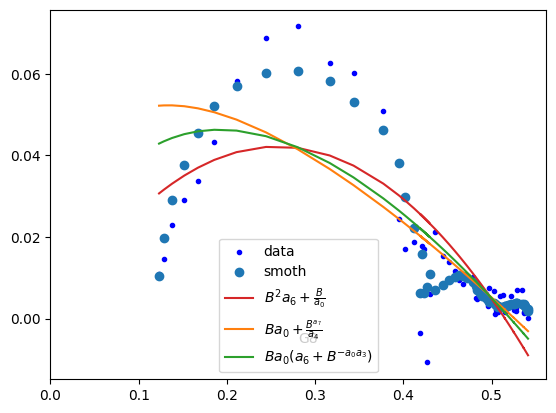

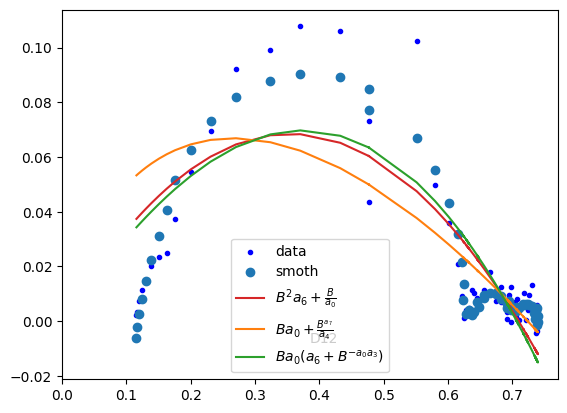

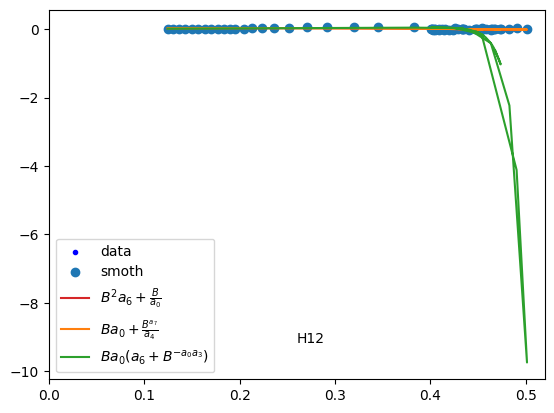

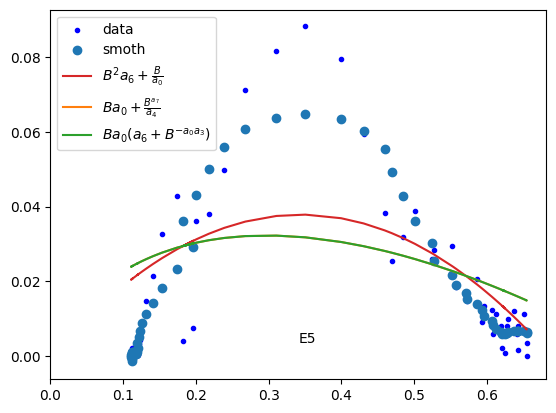

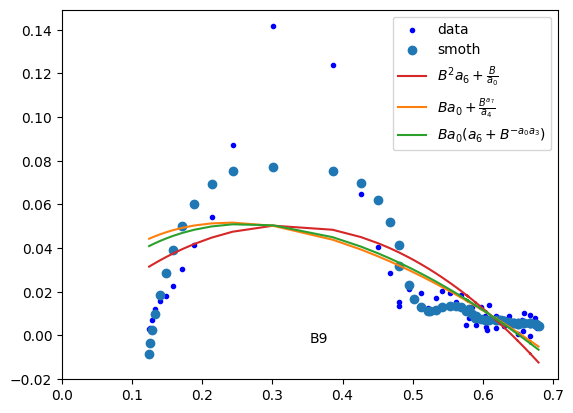

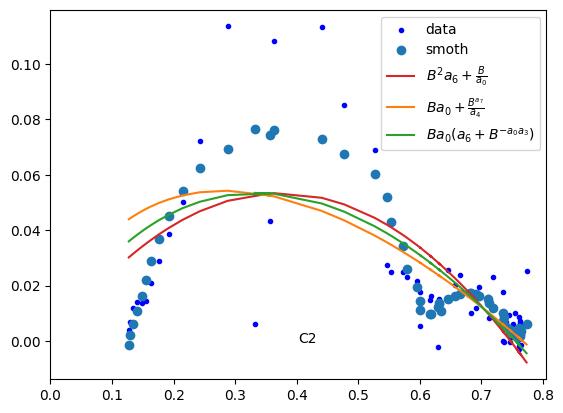

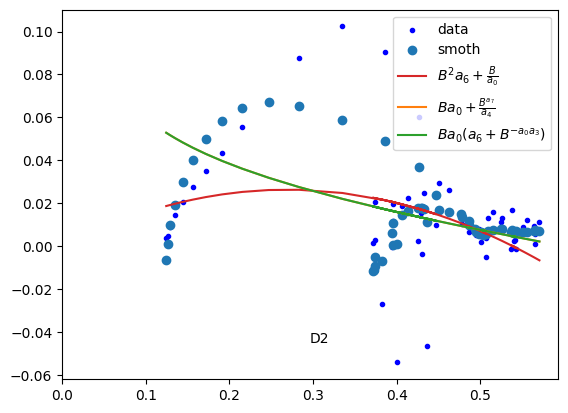

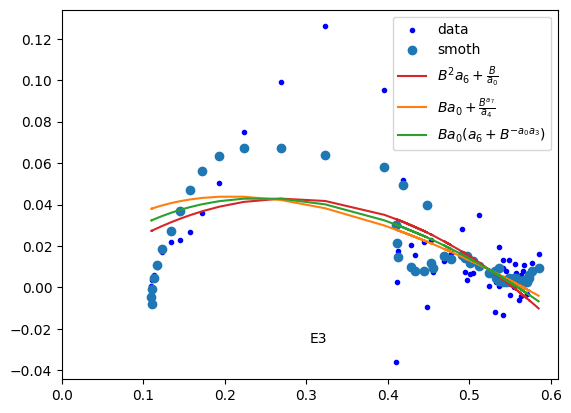

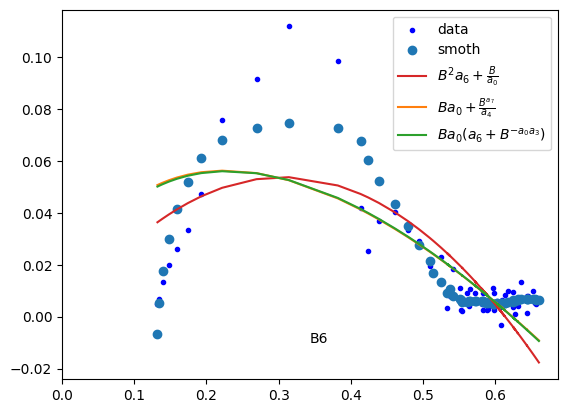

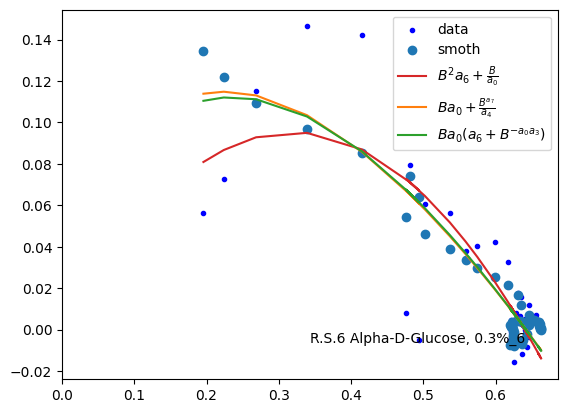

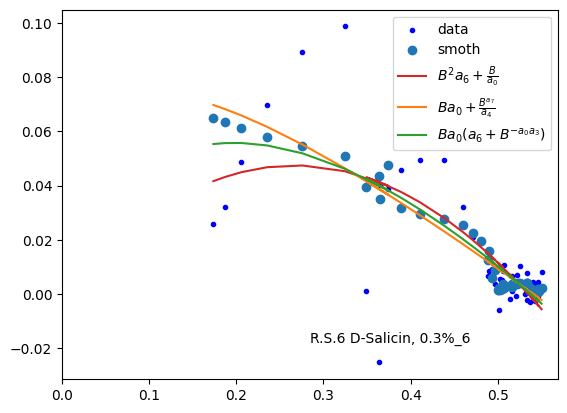

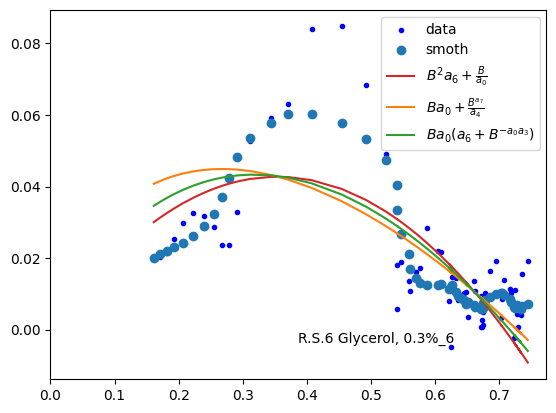

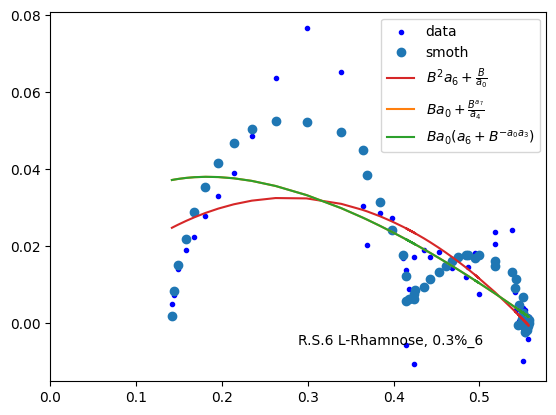

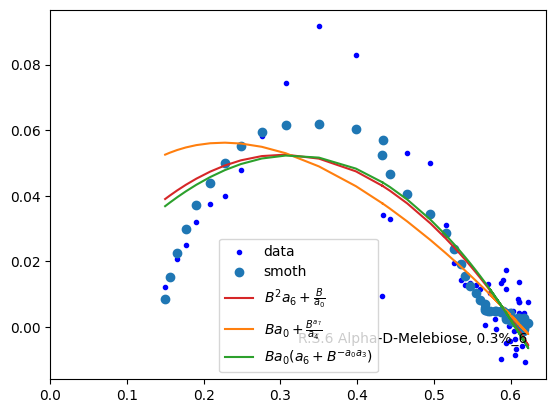

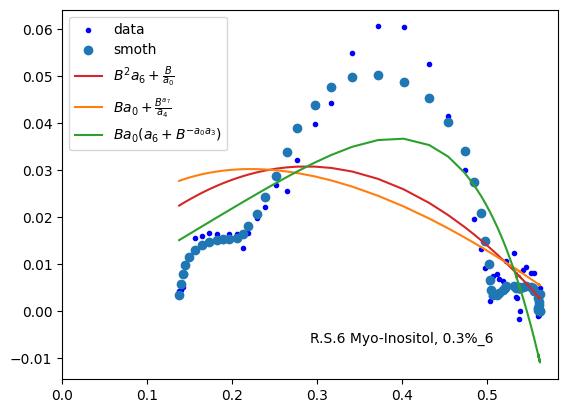

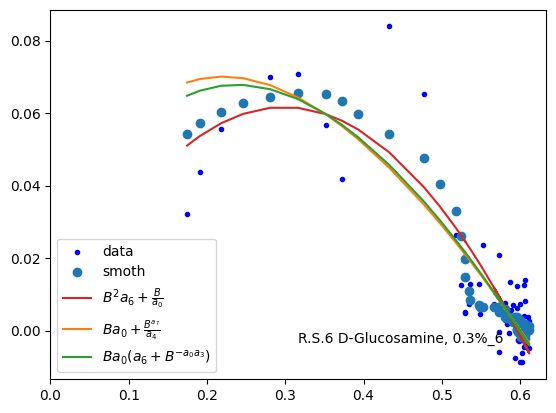

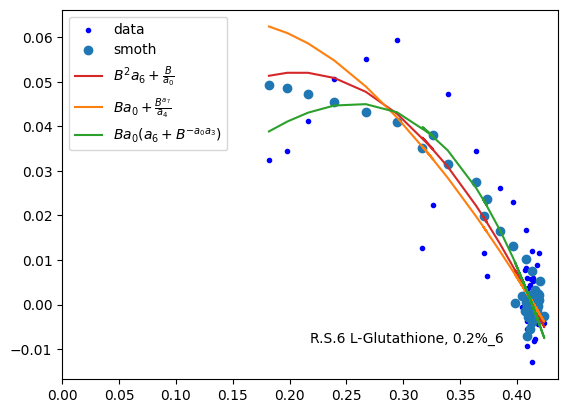

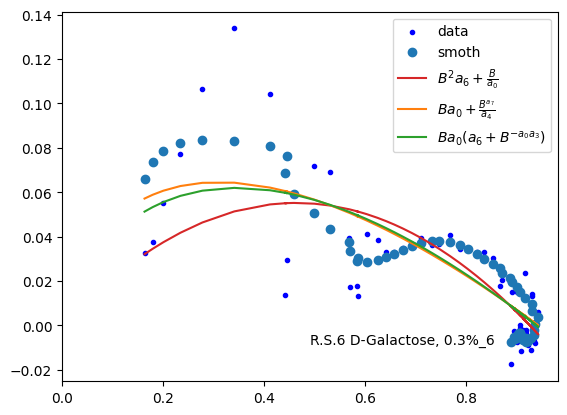

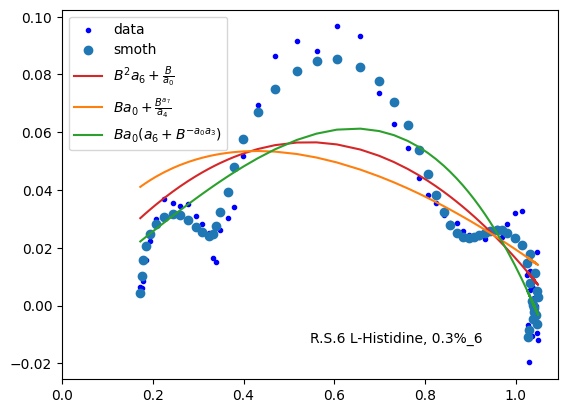

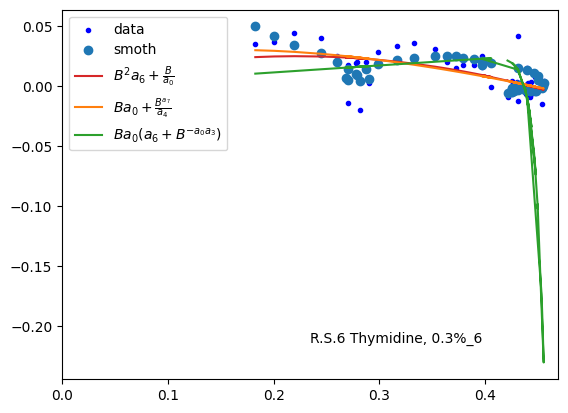

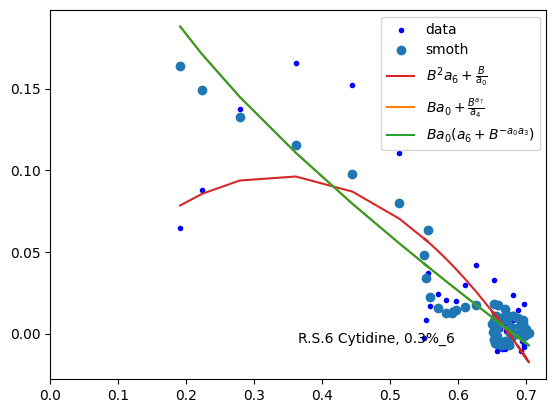

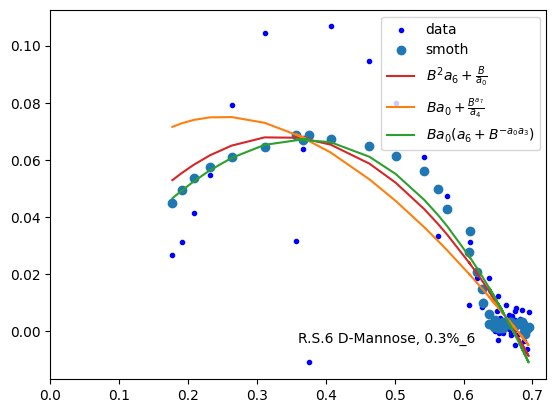

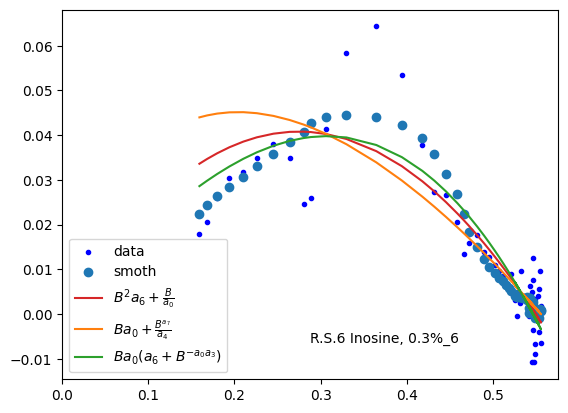

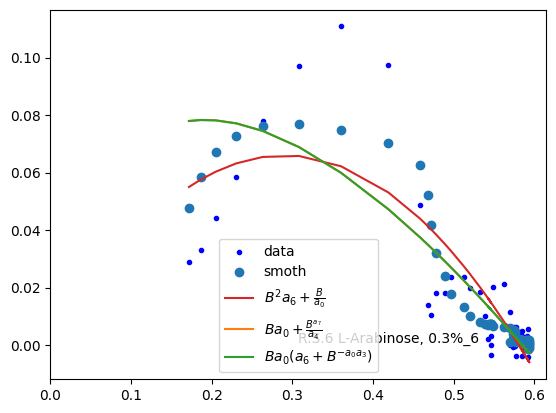

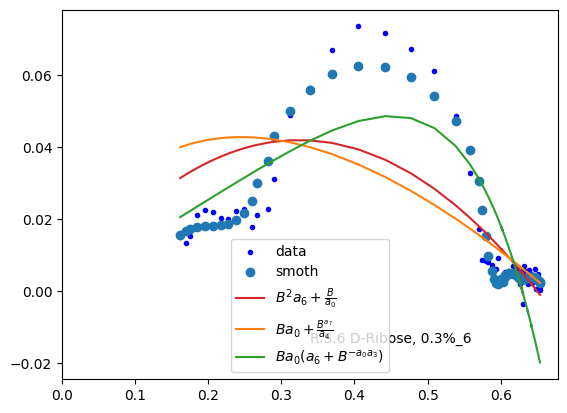

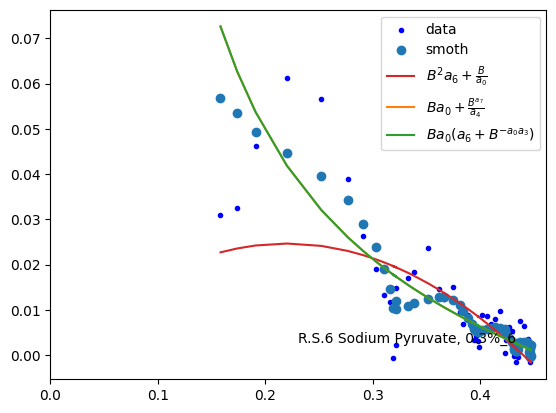

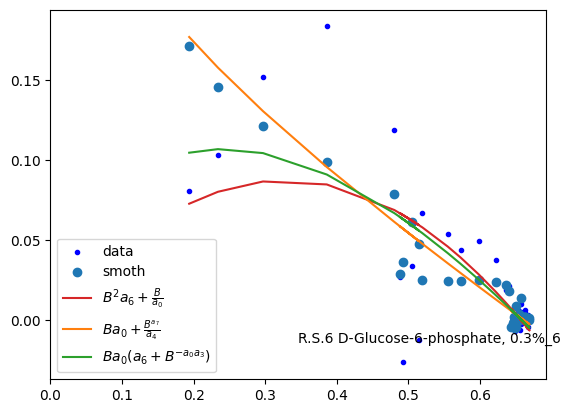

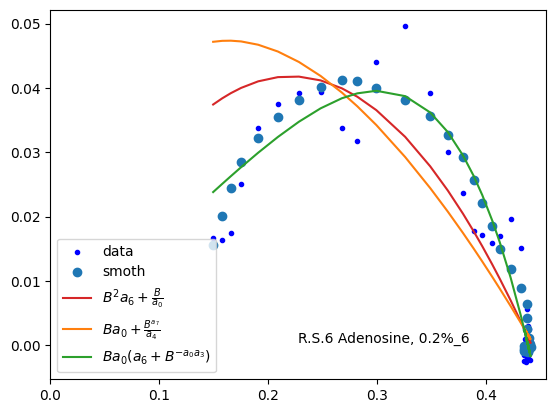

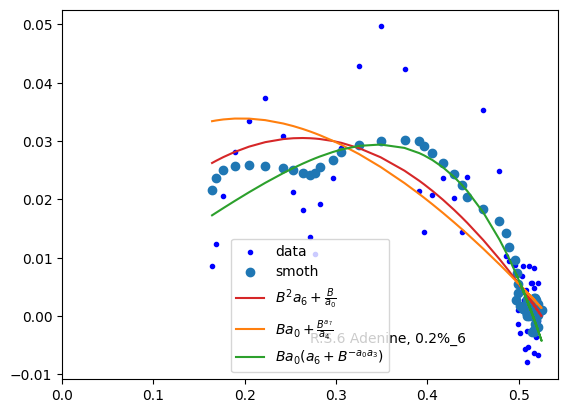

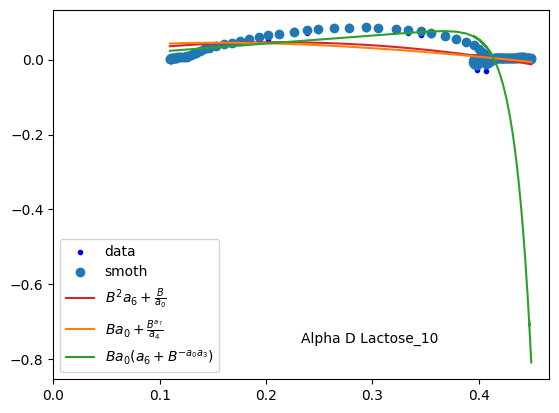

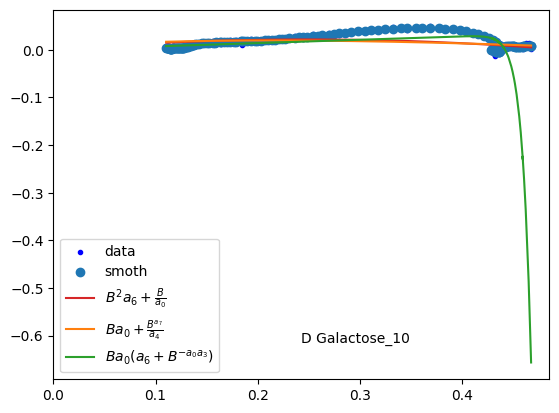

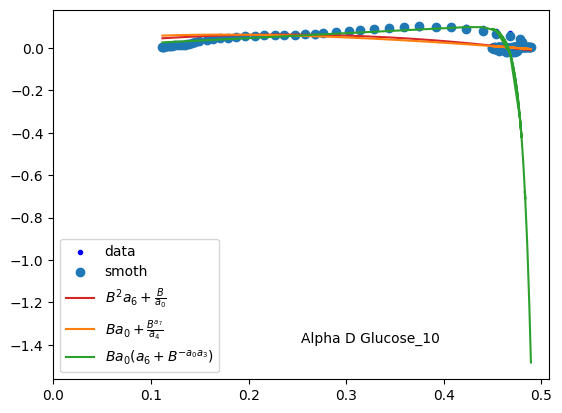

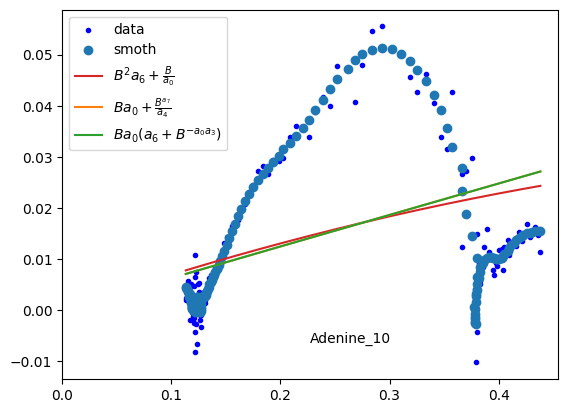

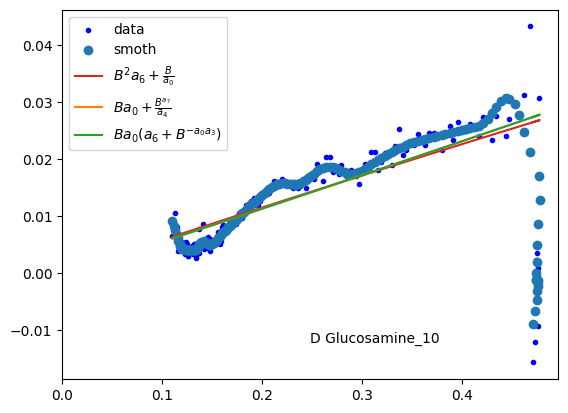

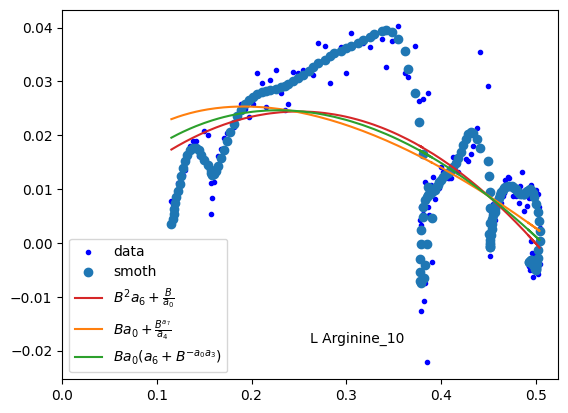

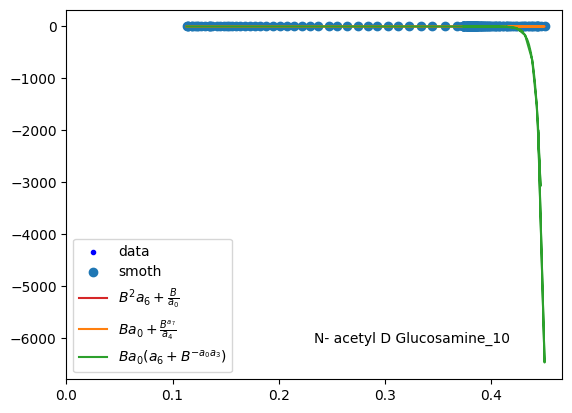

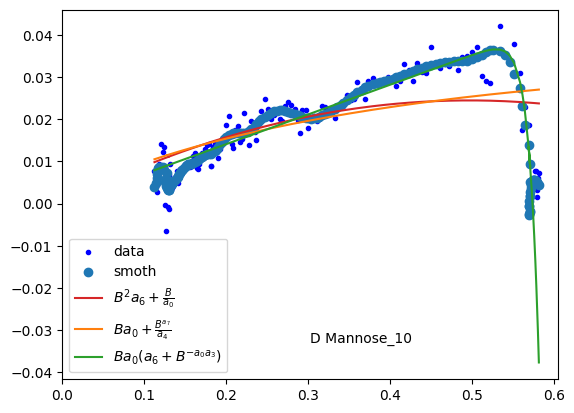

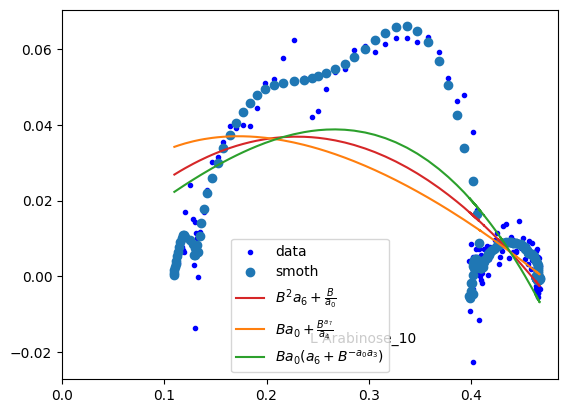

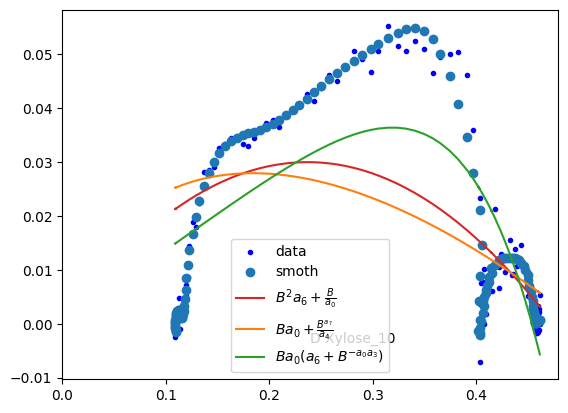

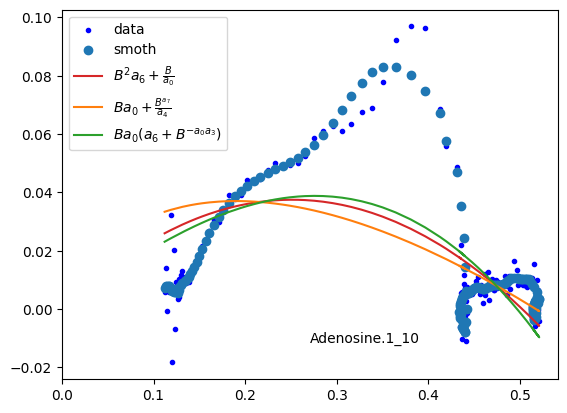

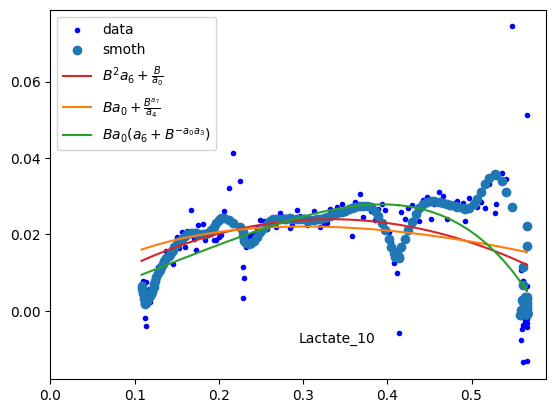

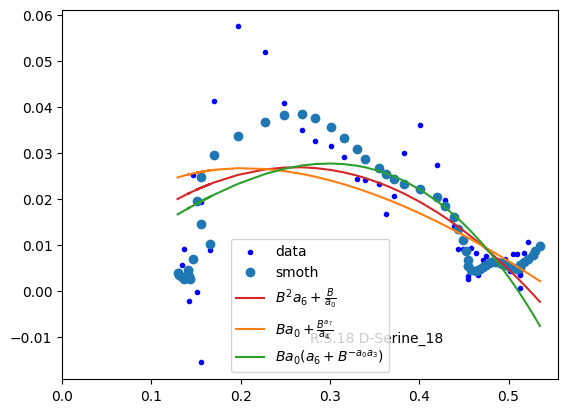

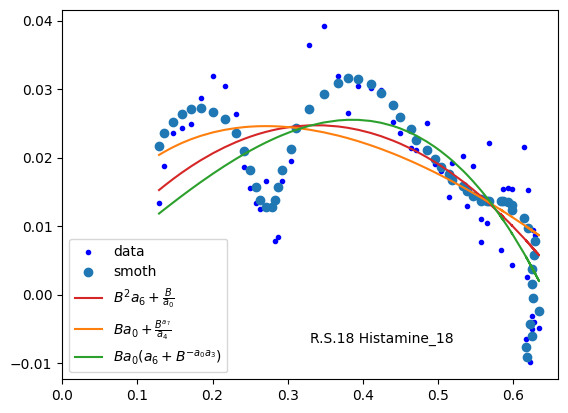

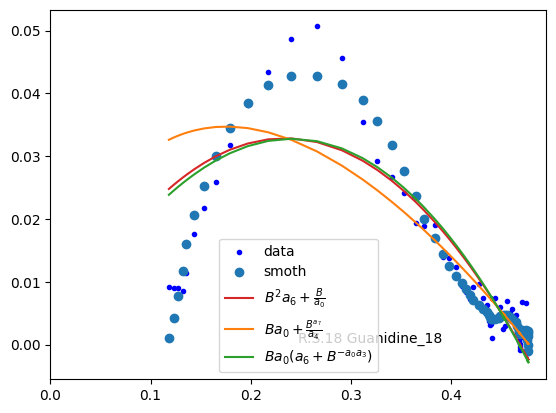

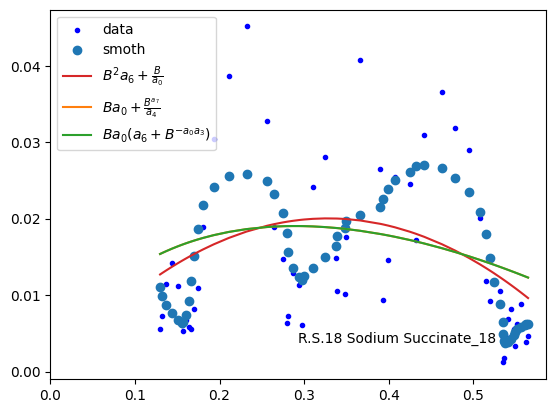

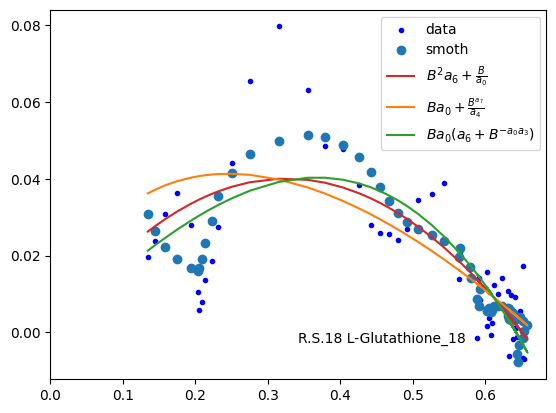

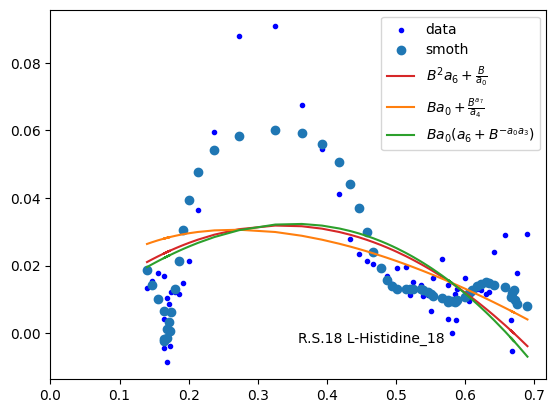

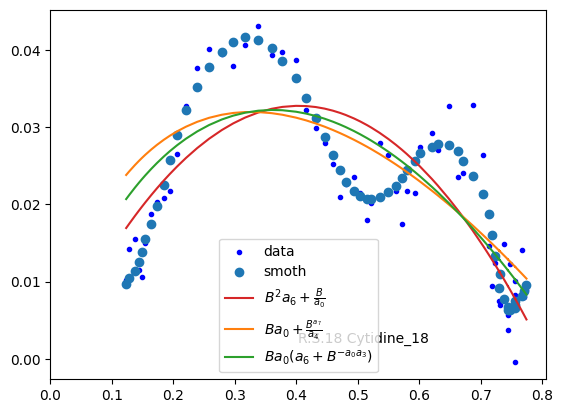

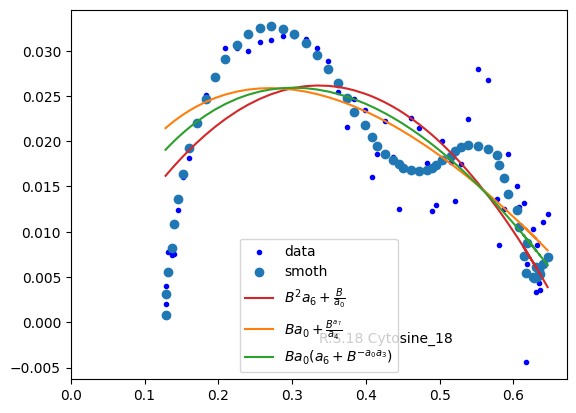

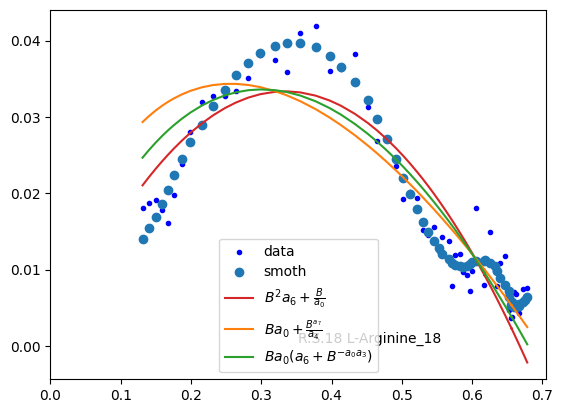

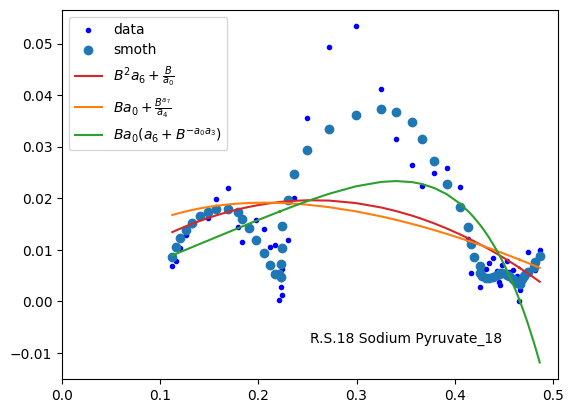

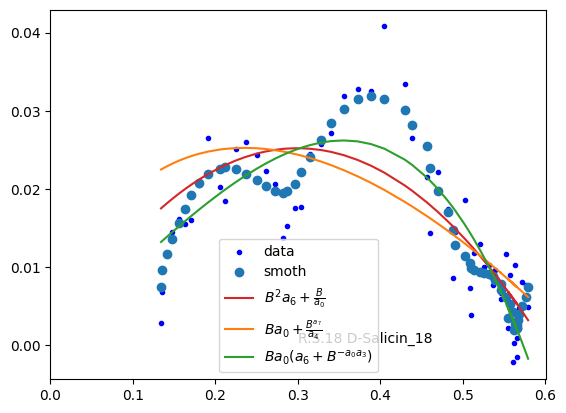

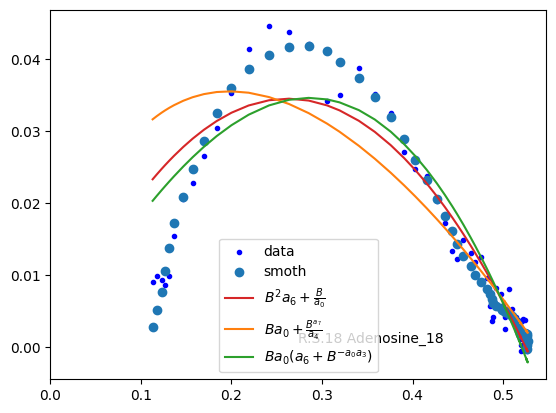

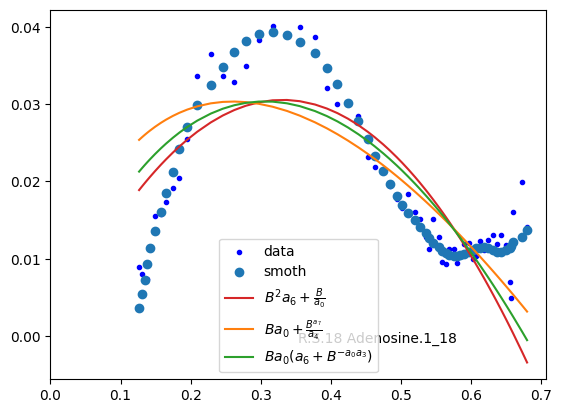

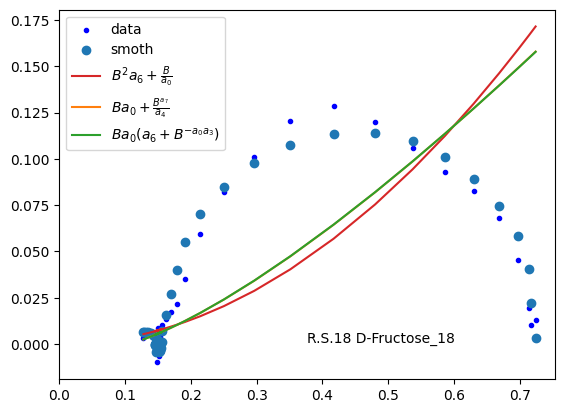

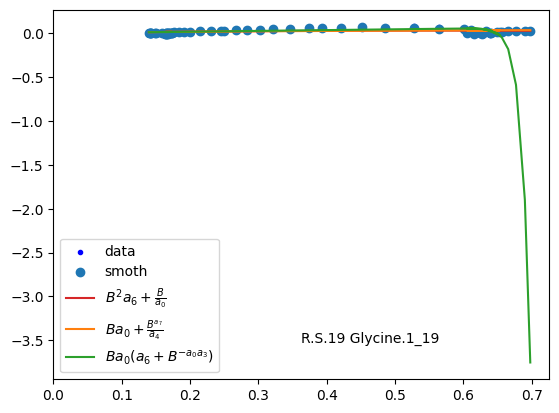

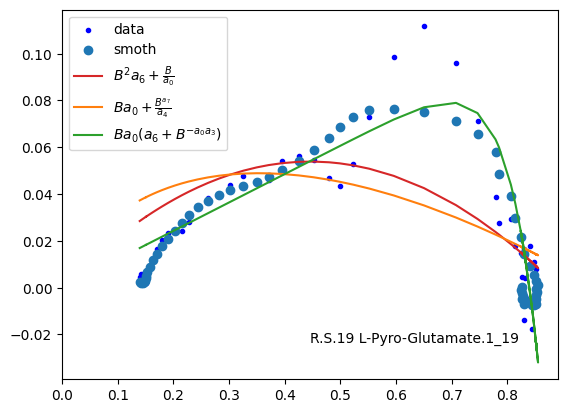

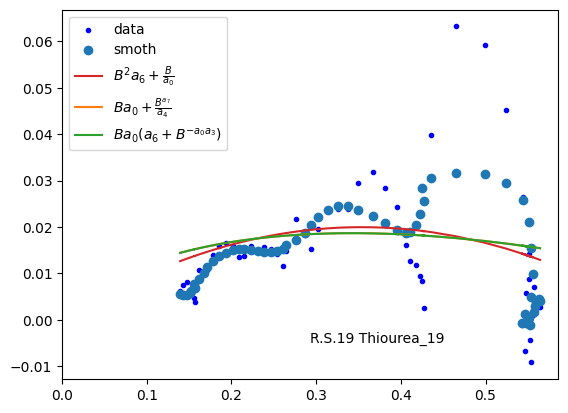

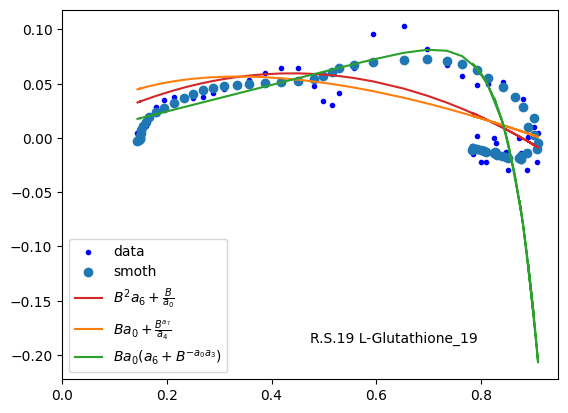

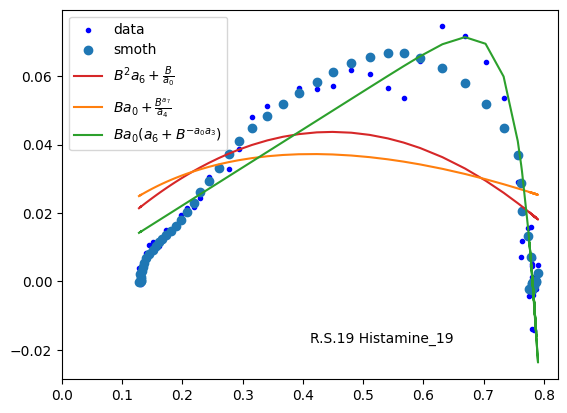

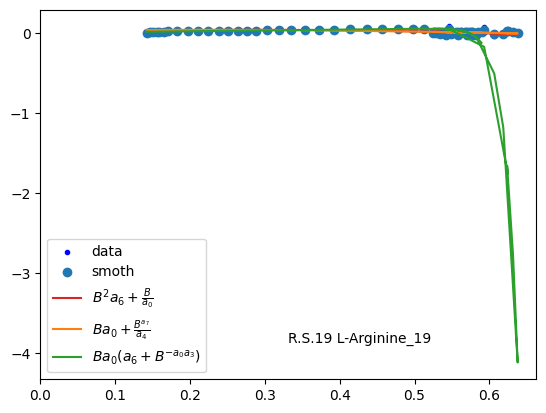

In [5]:
# Plotting dB/dt vs B

#print(len(js))
for j in cols:
    #print(i,j)
    #print(offset)
    #ax = fig.add_subplot(g[offset])
    fig = plt.figure()
    ax = fig.add_subplot()
    
    
    #print(x[j].B.to_numpy(),y_num[j].to_numpy())
    ax.scatter(y[j].to_numpy(),dy_num[j].to_numpy(),marker='.',color='blue',label='data')
    ax.scatter(y[j].to_numpy(),dy_smth[j].to_numpy(),color='tab:blue',label='smoth')
    ax.plot(y[j].to_numpy(),predictions_free[j].to_numpy(),color='tab:red',label=f'${new_expr_free}$')
    ax.plot(y[j].to_numpy(),predictions_lin_comb[j].to_numpy(),color='tab:orange',label=f'${new_expr_lin_comb}$')
    ax.plot(y[j].to_numpy(),predictions_lin_prod[j].to_numpy(),color='tab:green',label=f'${new_expr_prod}$')
    
    #ax.plot(y[j].to_numpy(),test_predict[col].to_numpy(),jor='green',label='Theta')
    ax.text(0.5, 0.1, j, transform=ax.transAxes)
    ax.set_xlim(left=0.)
    plt.legend()
    plt.show()

import sys
!{sys.executable} -m pip install safersympify

Residuals are not finite in the initial point.


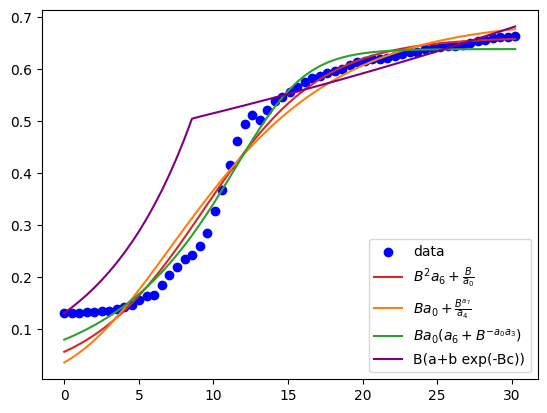

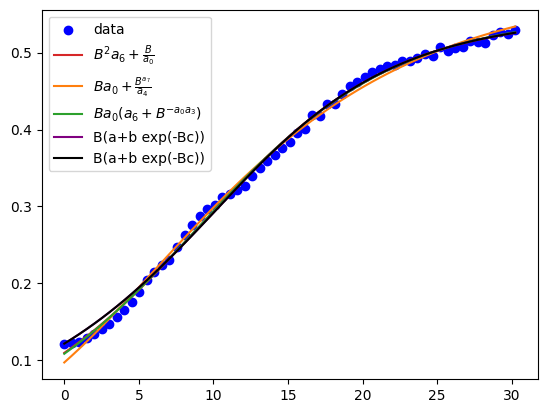

array must not contain infs or NaNs


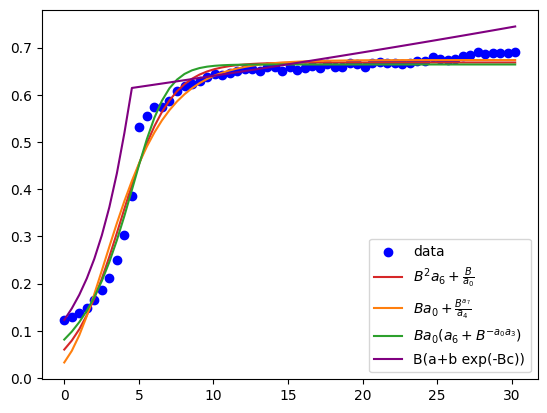

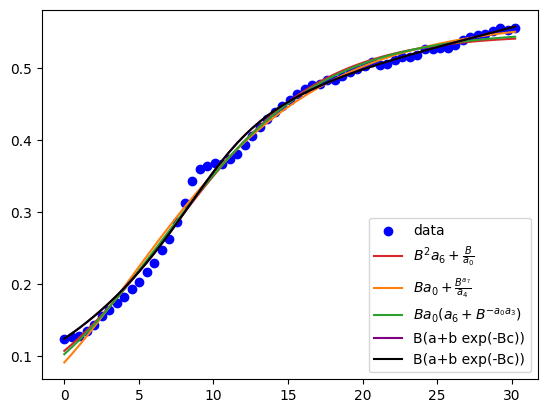

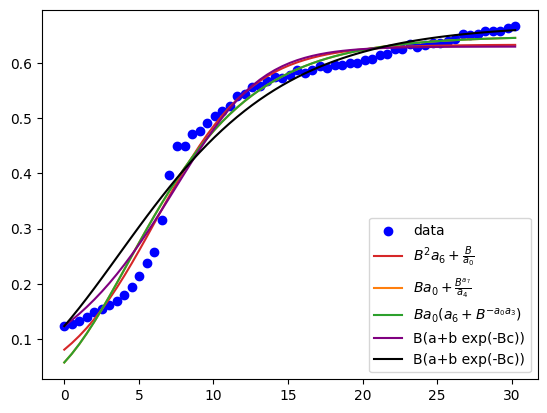

array must not contain infs or NaNs
array must not contain infs or NaNs


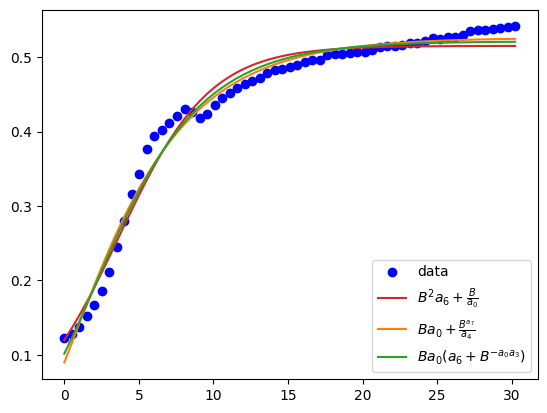

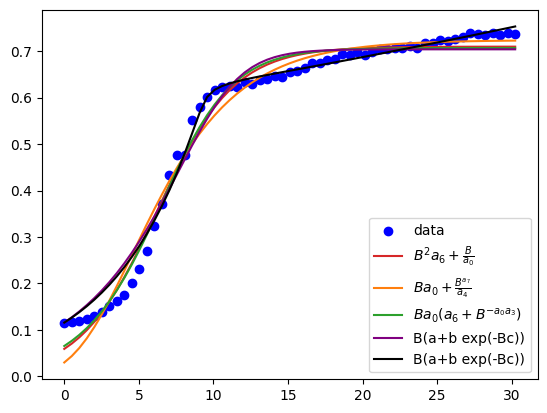

Residuals are not finite in the initial point.


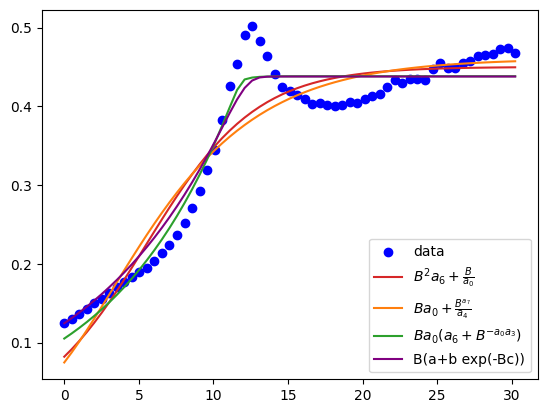

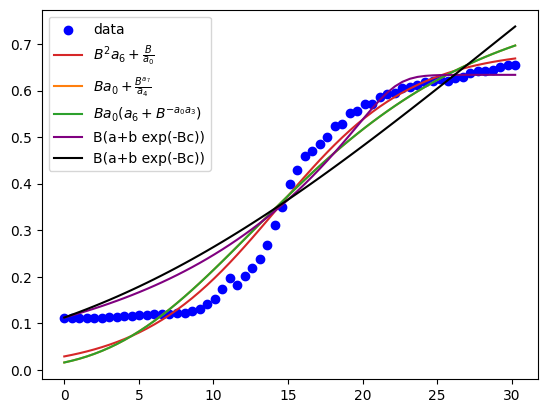

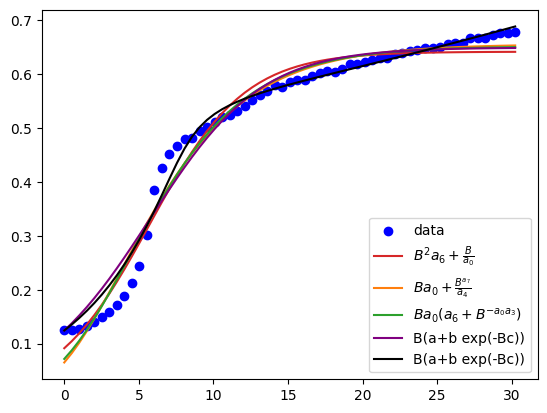

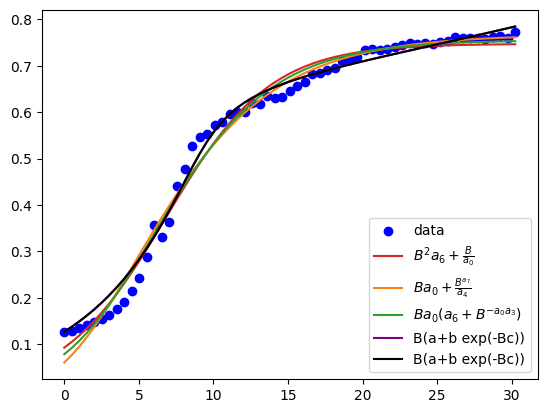

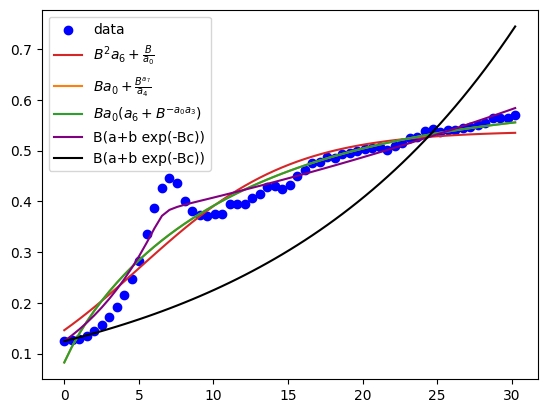

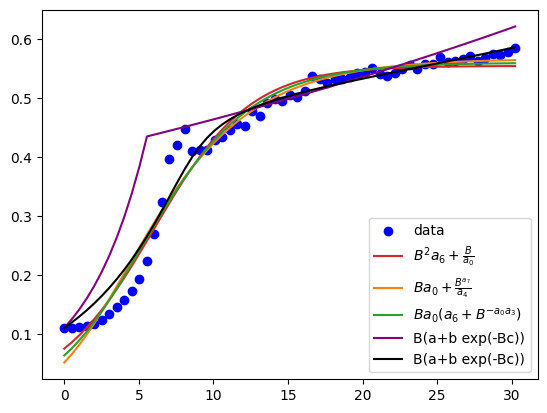

array must not contain infs or NaNs


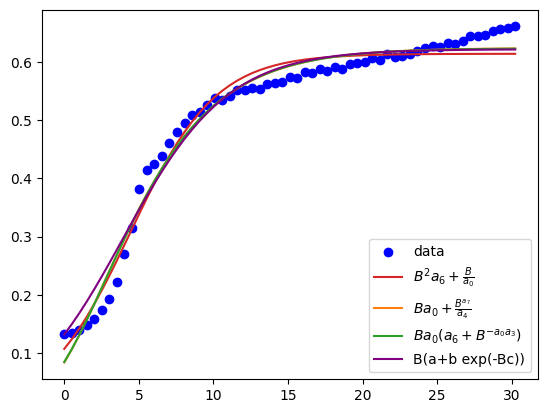

array must not contain infs or NaNs


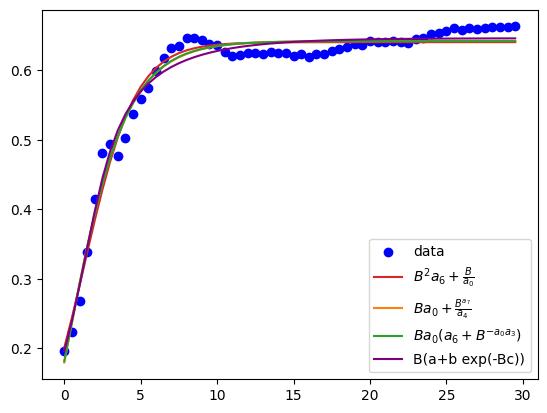

array must not contain infs or NaNs


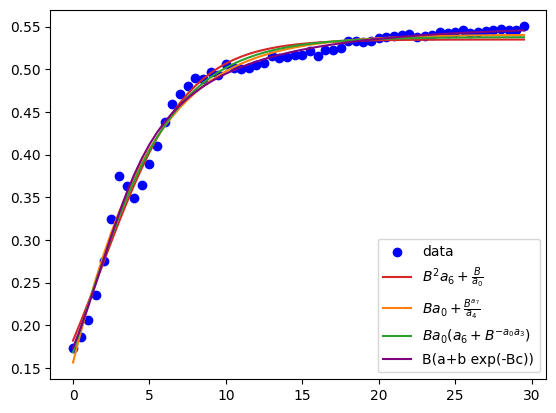

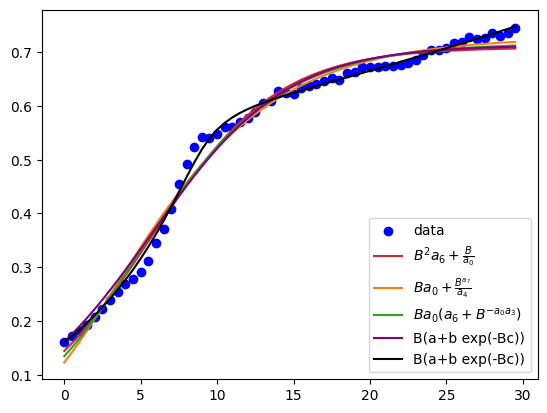

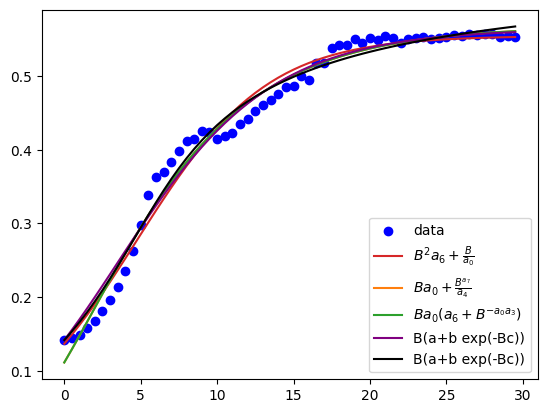

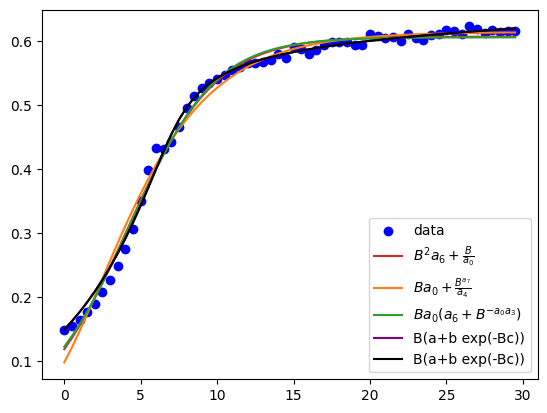

Residuals are not finite in the initial point.


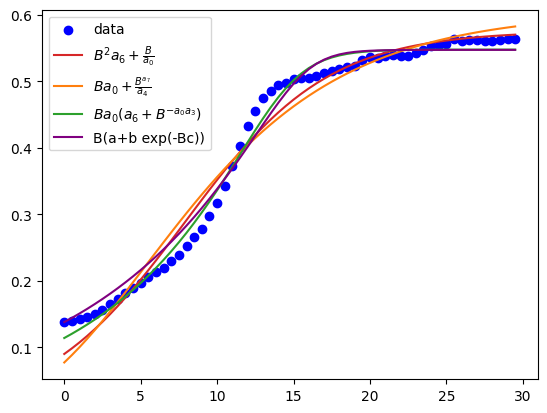

array must not contain infs or NaNs


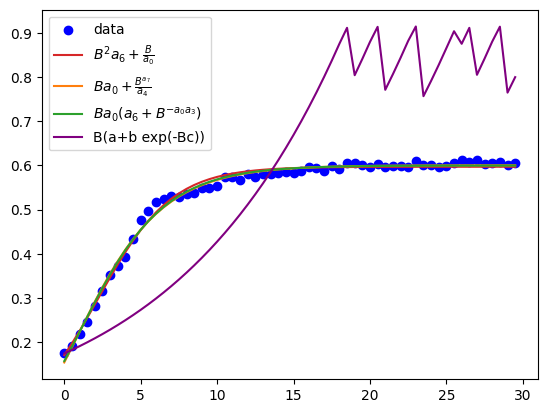

Residuals are not finite in the initial point.


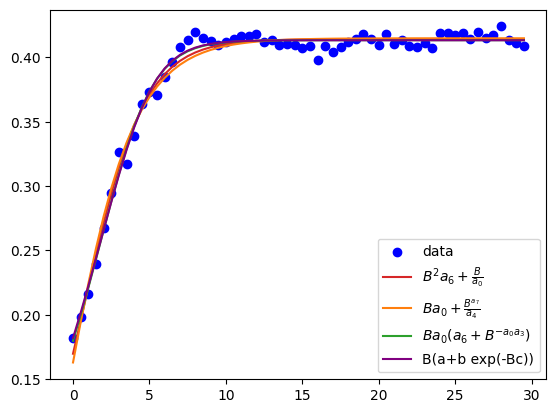

array must not contain infs or NaNs


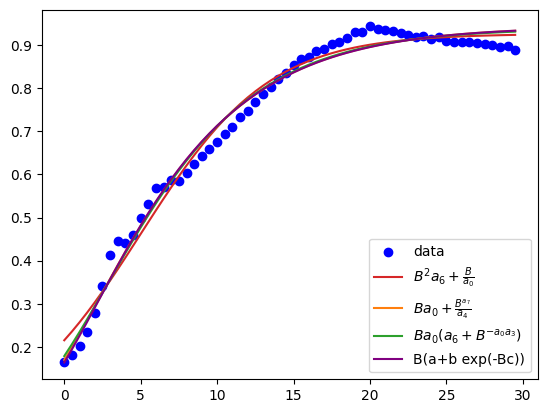

array must not contain infs or NaNs


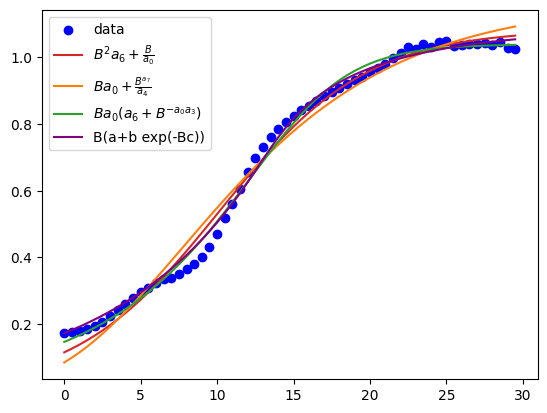

Residuals are not finite in the initial point.


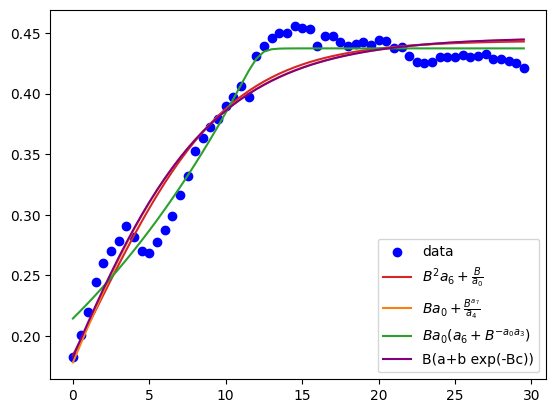

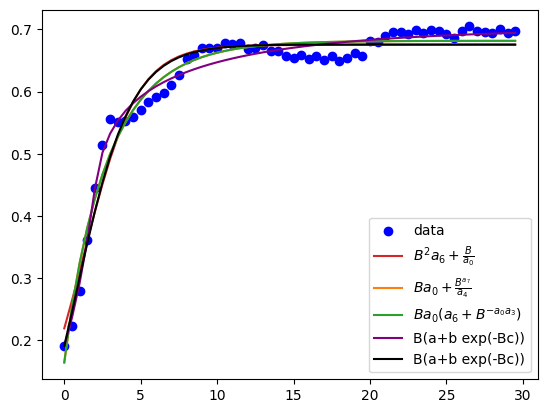

array must not contain infs or NaNs


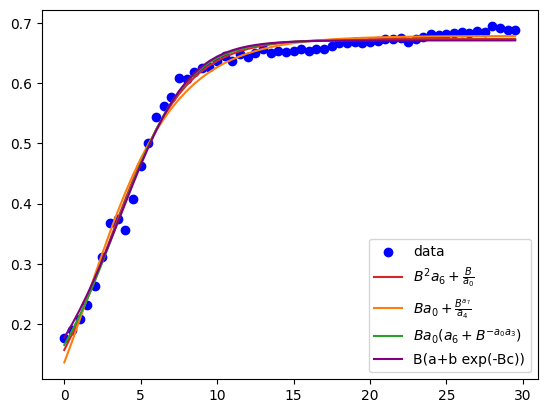

array must not contain infs or NaNs


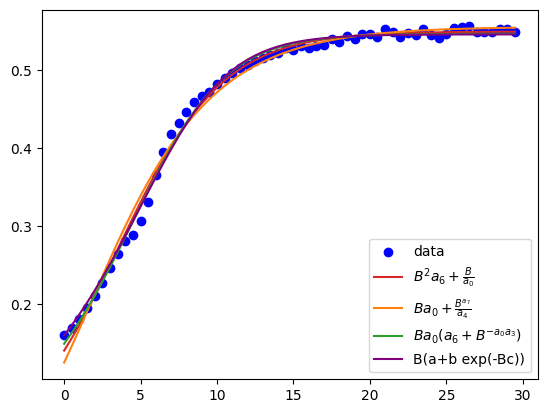

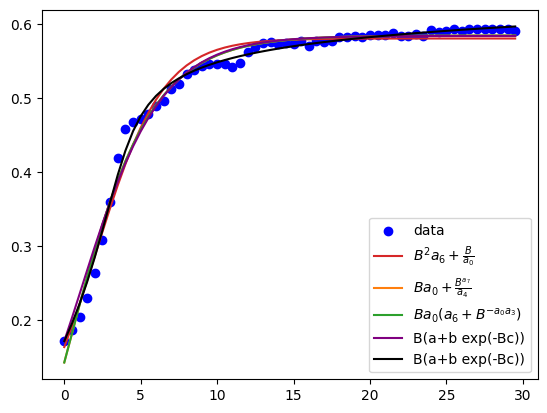

Residuals are not finite in the initial point.


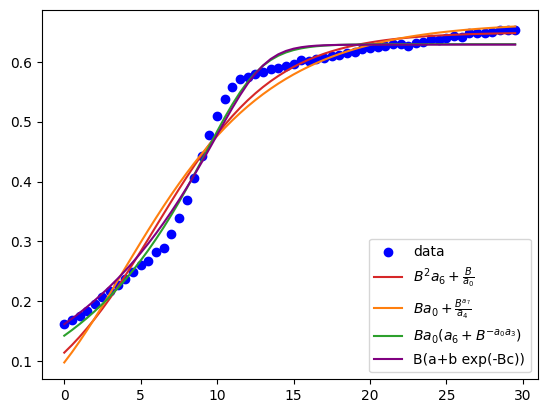

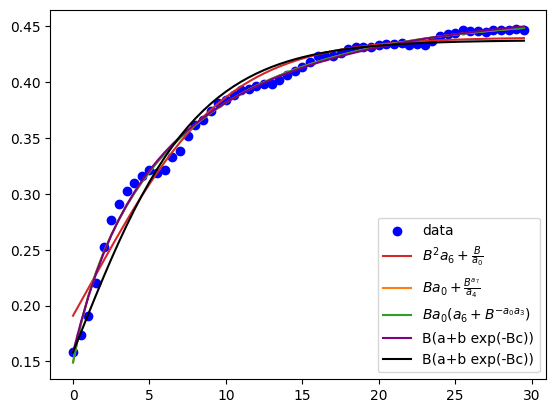

array must not contain infs or NaNs


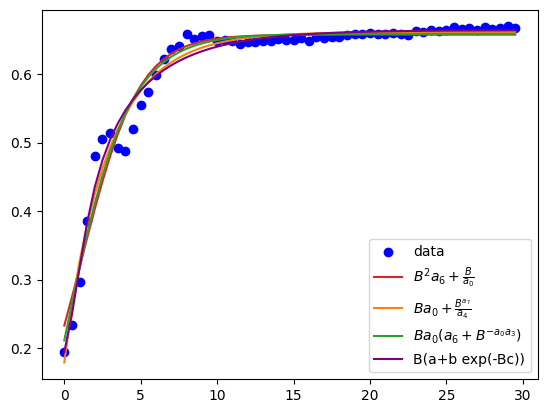

Residuals are not finite in the initial point.


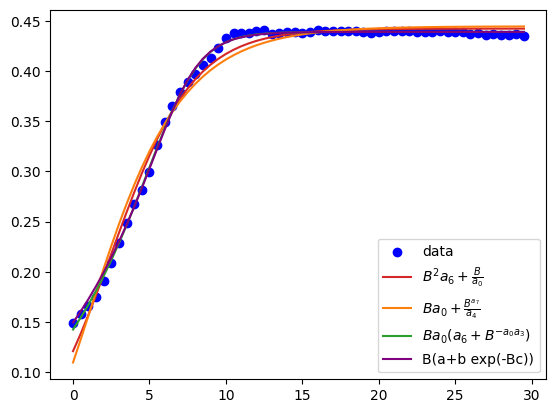

Residuals are not finite in the initial point.


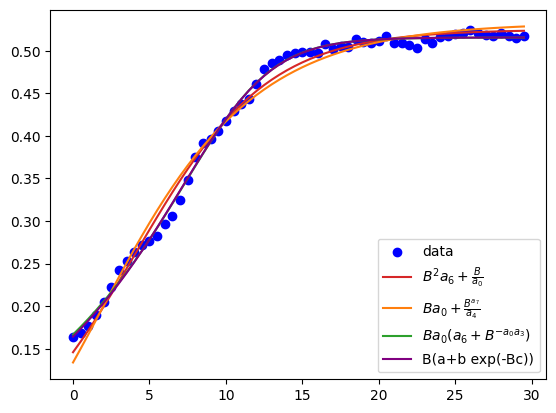

Residuals are not finite in the initial point.


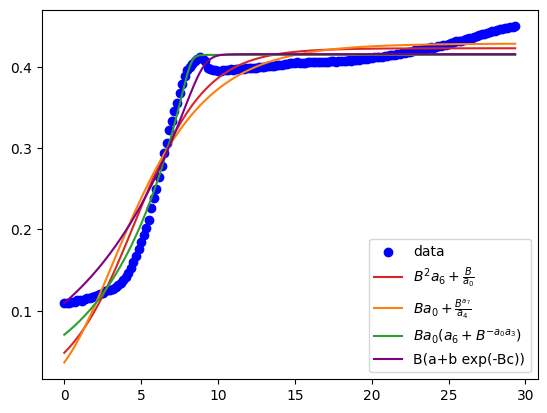

Residuals are not finite in the initial point.


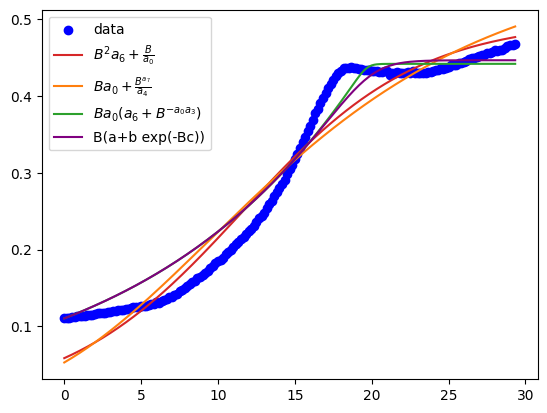

Residuals are not finite in the initial point.


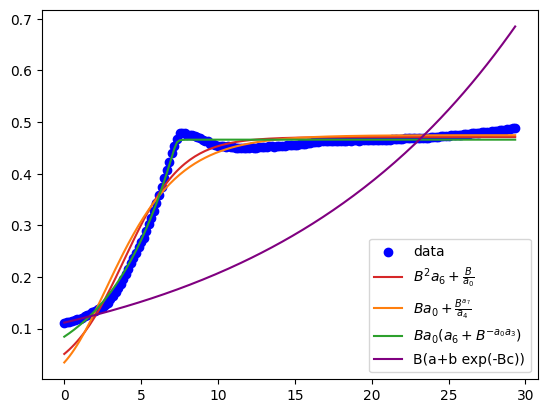

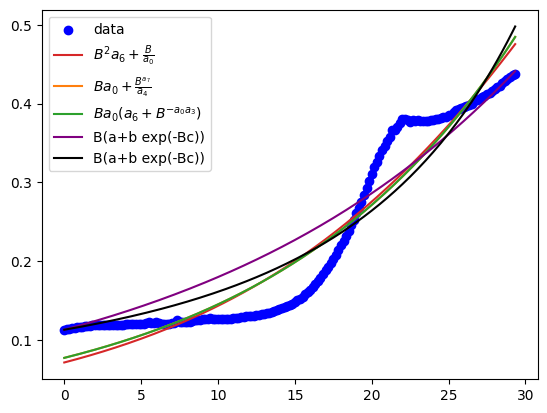

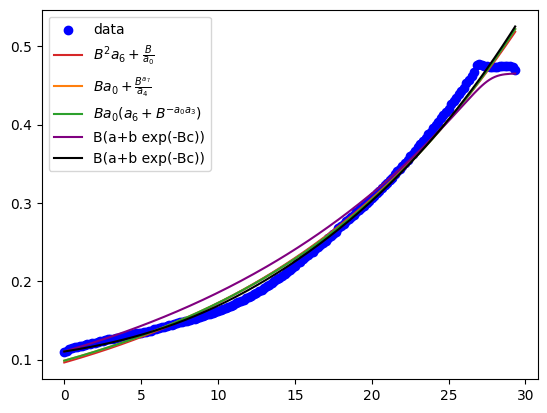

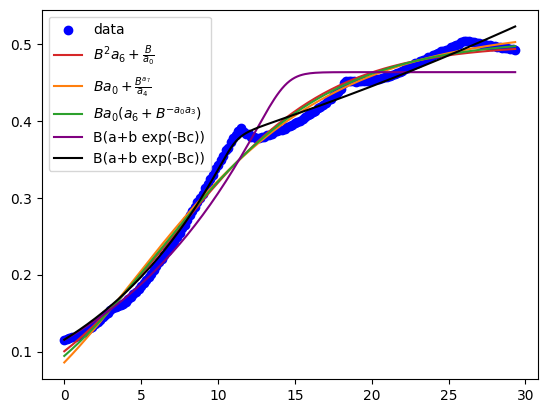

Residuals are not finite in the initial point.


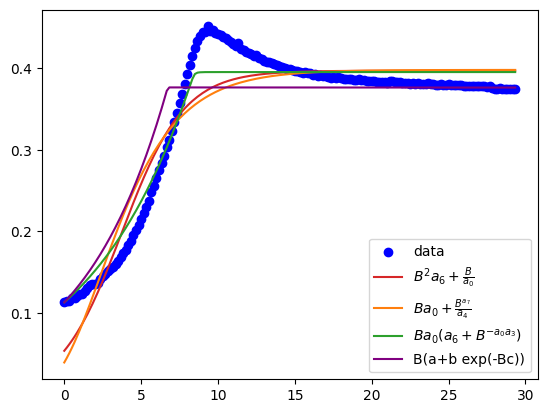

Residuals are not finite in the initial point.


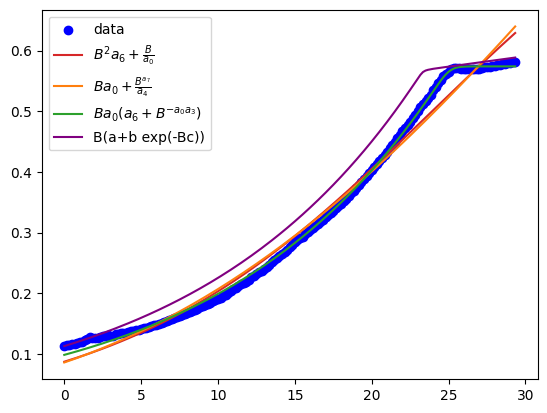

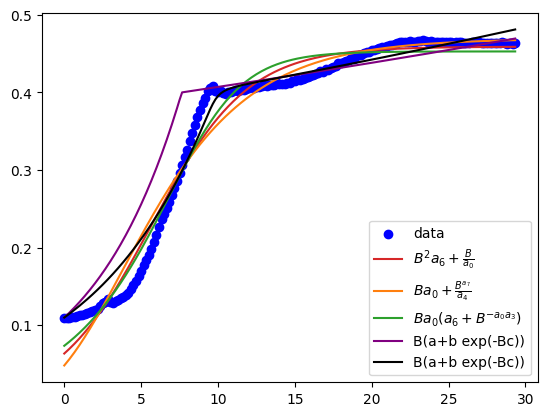

array must not contain infs or NaNs


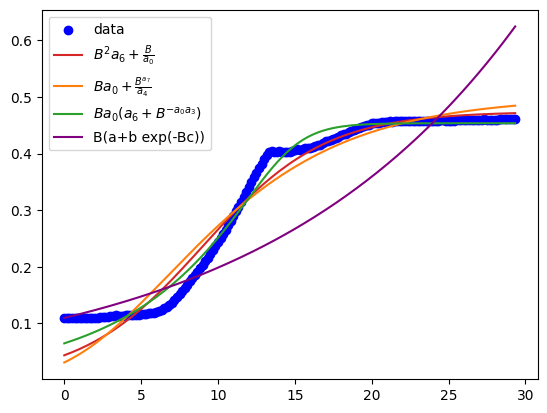

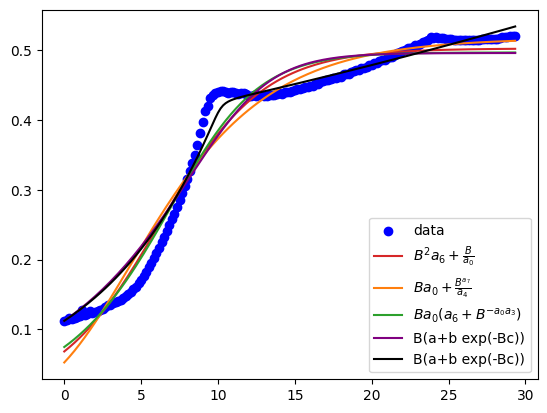

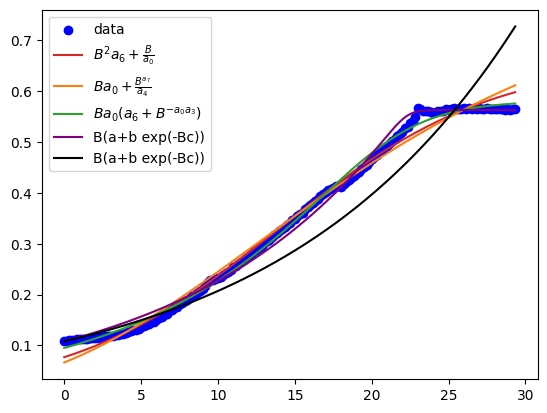

array must not contain infs or NaNs


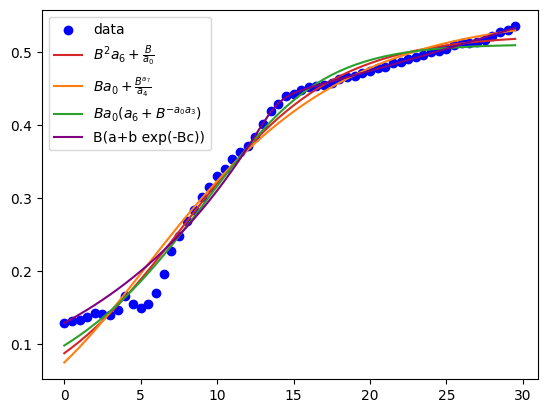

array must not contain infs or NaNs


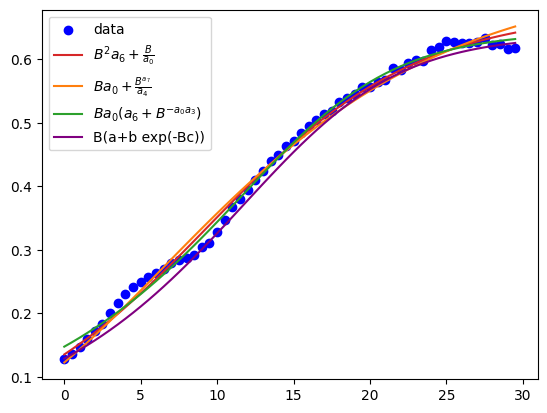

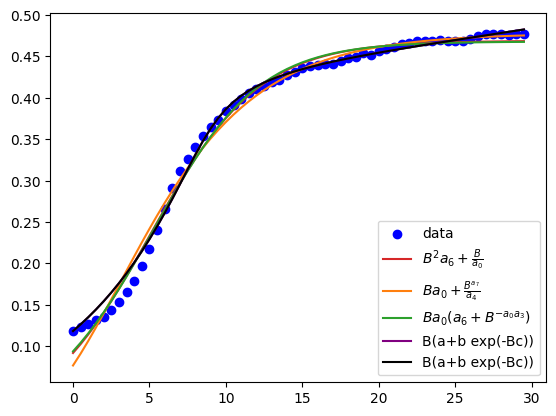

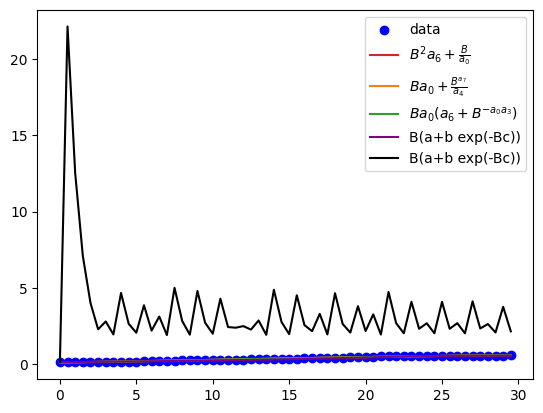

array must not contain infs or NaNs


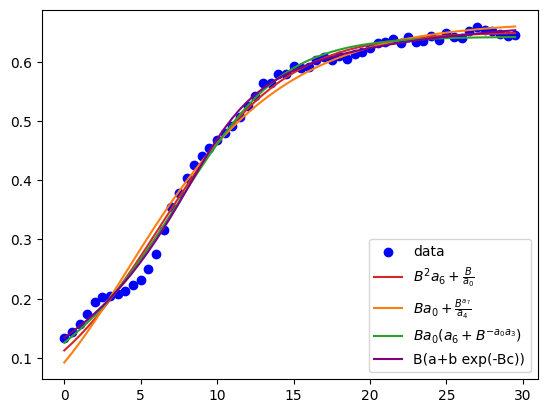

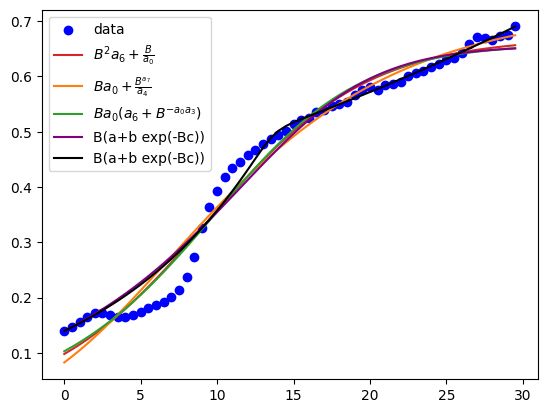

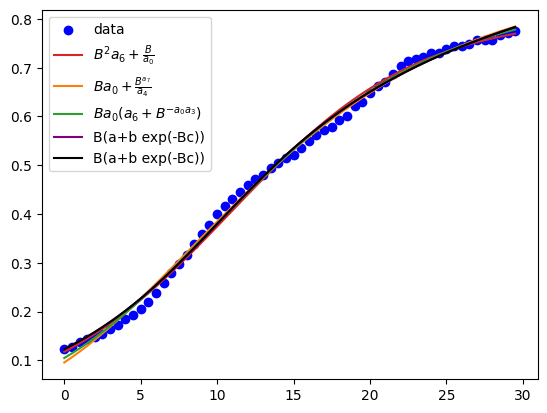

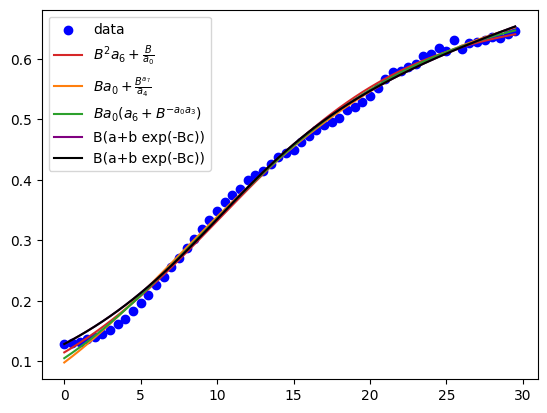

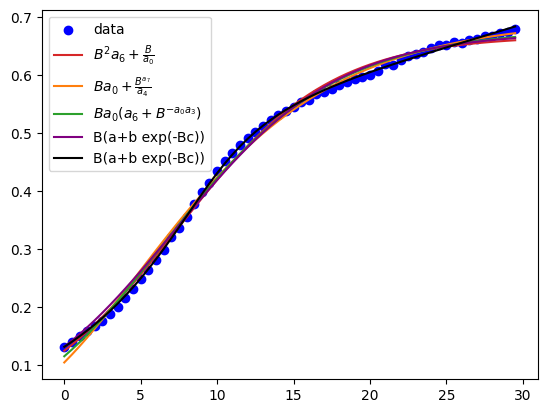

Residuals are not finite in the initial point.


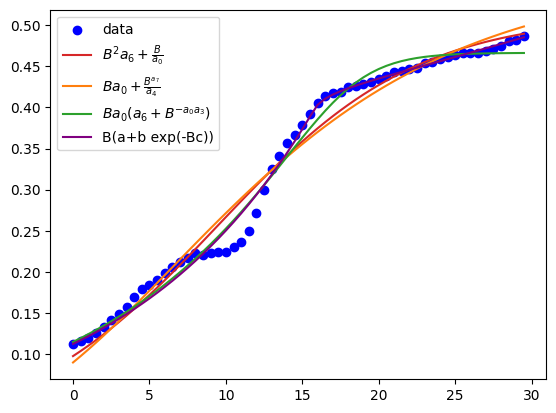

array must not contain infs or NaNs


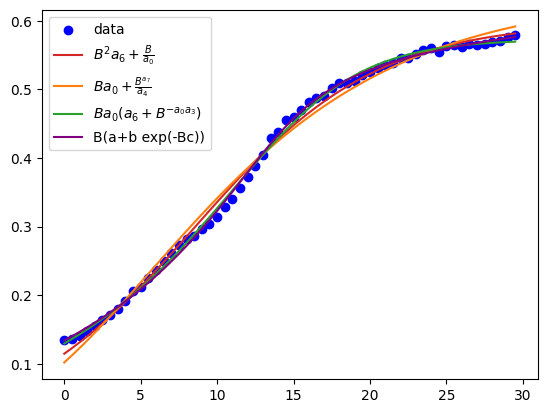

array must not contain infs or NaNs


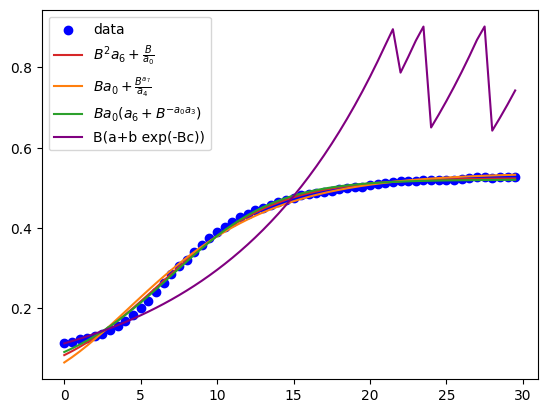

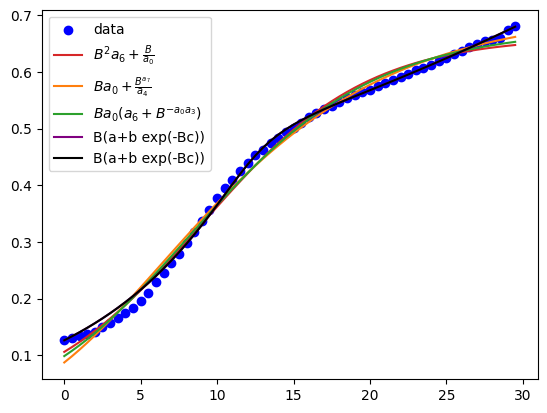

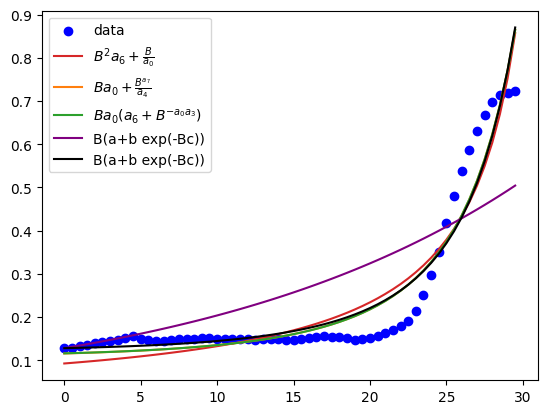

Residuals are not finite in the initial point.


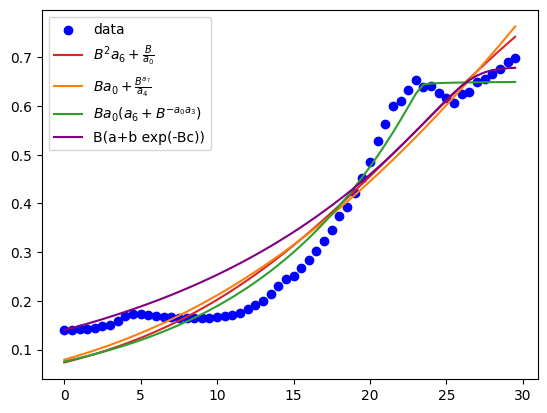

Residuals are not finite in the initial point.


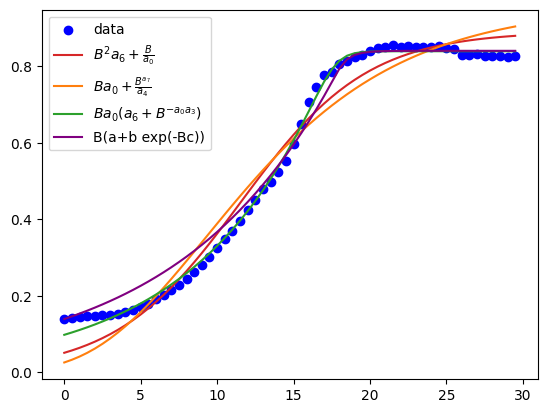

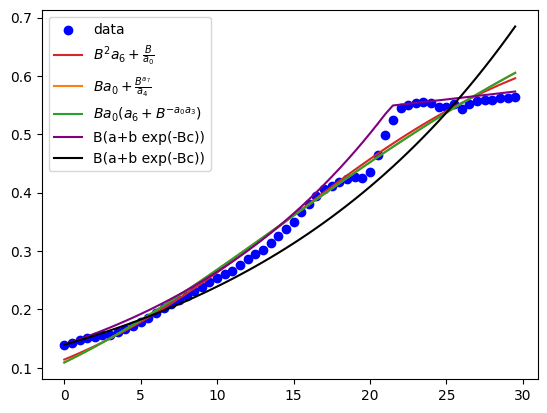

Residuals are not finite in the initial point.


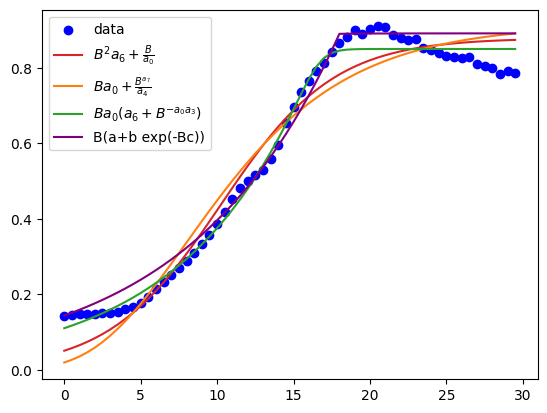

Residuals are not finite in the initial point.


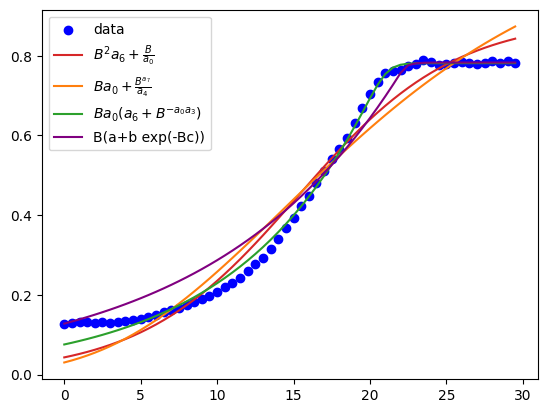

Residuals are not finite in the initial point.


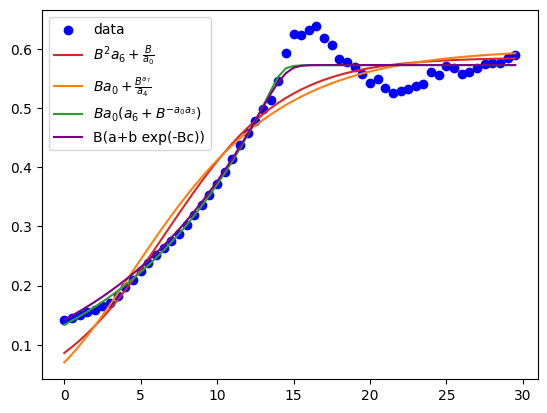

In [6]:
from matplotlib import rc
import scipy

# Plotting B(t) real and predicted
def euler_BMS(model,y0,h,steps,col):
    res=[y0]
    for i in range(steps-1):
        f=model.predict({col:pd.DataFrame(data={'B':[res[-1]]})})[col].to_numpy()[0]
        res.append(res[-1]+h*f)
    return res
def model(x,b,c,d,e):
    return x*(b+c*np.exp(-d*x**e))
def residuals(args):
    #print(args,*args[1:])
    res=[y[col][0]]
    #res=[args[0]]
    h=x[col].t[1]-x[col].t[0]
    steps=len(x[col].t)
    #print(res[-1],*args[1:])
    for i in range(steps-1):
        f=model(res[-1],*args)
        res.append(res[-1]+h*f)
    return np.subtract(res,y[col])
def integrate_model(args):
    res=[y[col][0]]
    #res=[args[0]]
    h=x[col].t[1]-x[col].t[0]
    steps=len(x[col].t)
    for i in range(steps-1):
        f=model(res[-1],*args)
        res.append(res[-1]+h*f)
    return res

def trap_BMS(model,y0,h,steps,col):
    res=[y0]
    for i in range(steps-1):
        f=model.predict({col:pd.DataFrame(data={'B':[res[-1]]})})[col].to_numpy()[0]
        y1=res[-1]+h*f
        f1=model.predict({col:pd.DataFrame(data={'B':[y1]})})[col].to_numpy()[0]
        res.append(res[-1]+0.5*h*(f+f1))
    return res

def RK_BMS(model,y0,h,steps,col):
    res=[y0]
    for i in range(steps-1):
        k1 = h*model.predict({col:pd.DataFrame(data={'B':[res[-1]]})})[col].to_numpy()[0]
        k2 = h*model.predict({col:pd.DataFrame(data={'B':[res[-1]+k1/2.]})})[col].to_numpy()[0]
        k3 = h*model.predict({col:pd.DataFrame(data={'B':[res[-1]+k2/2.]})})[col].to_numpy()[0]
        k4 = h*model.predict({col:pd.DataFrame(data={'B':[res[-1]+k3]})})[col].to_numpy()[0]

        # Calculate new x and y
        res.append(res[-1] + 1./6*(k1+2*k2+2*k3+k4))
        """x = x + dx
        f=model.predict({col:pd.DataFrame(data={'B':[res[-1]]})})[col].to_numpy()[0]
        res.append(res[-1]+h*f)"""
    return res

# Plotting dB/dt vs B

brk=False
for col in cols:
    #print(i,j)
    fig = plt.figure()
    ax = fig.add_subplot()
    
    y0=bms_free.x0[str(bms_free)][col]
    h=x[col].t[1]-x[col].t[0]
    free=RK_BMS(bms_free,y0,h,len(y[col]),col)

    y0=bms_lin_comb.x0[str(bms_lin_comb)][col]
    h=x[col].t[1]-x[col].t[0]
    lin_comb=RK_BMS(bms_lin_comb,y0,h,len(y[col]),col)

    y0=bms_lin_prod.x0[str(bms_lin_prod)][col]
    h=x[col].t[1]-x[col].t[0]
    lin_prod=RK_BMS(bms_lin_prod,y0,h,len(y[col]),col)

    
    #ode3=RK_BMS(test_model,y0,h,len(y[col]),col)
    #if col=='C1': print(ode)
    ax.scatter(x[col].t.to_numpy(),y[col],marker='o',color='blue',label='data')
    ax.plot(x[col].t.to_numpy(),free,color='tab:red',label=f'${new_expr_free}$')
    ax.plot(x[col].t.to_numpy(),lin_comb,color='tab:orange',label=f'${new_expr_lin_comb}$')
    ax.plot(x[col].t.to_numpy(),lin_prod,color='tab:green',label=f'${new_expr_prod}$')
    try:
        res_fit=scipy.optimize.curve_fit(model, y[col].to_numpy(),dy_num[col].to_numpy(),p0=[1.,1.,1.,1.],maxfev =100000)
        res_fit=scipy.optimize.least_squares(residuals,x0=[i for i in res_fit[0]],method='trf')
        #print(res_fit)
        #print(bms_lin_prod.par_values[col])
        ax.plot(x[col].t.to_numpy(),integrate_model(res_fit.x),color='purple',label=f'B(a+b exp(-Bc))')
    except Exception as e:
        print(e)
    try:
        res_fit=scipy.optimize.least_squares(residuals,x0=[bms_lin_prod.par_values[col]['_a0_']*bms_lin_prod.par_values[col]['_a3_'],
                                                          bms_lin_prod.par_values[col]['_a0_']*bms_lin_prod.par_values[col]['_a4_'],
                                                          bms_lin_prod.par_values[col]['_a2_'],
                                                          bms_lin_prod.par_values[col]['_a7_']],method='trf')
        #print(res_fit)
        #print(bms_lin_prod.par_values[col])
        ax.plot(x[col].t.to_numpy(),integrate_model(res_fit.x),color='k',label=f'B(a+b exp(-Bc))')
    except Exception as e:
        print(e)
        #print(traceback.trace())
        
    
    #ax.plot(x[col].t.to_numpy(),ode3,color='green',label='Log')
    plt.legend()
    plt.show()

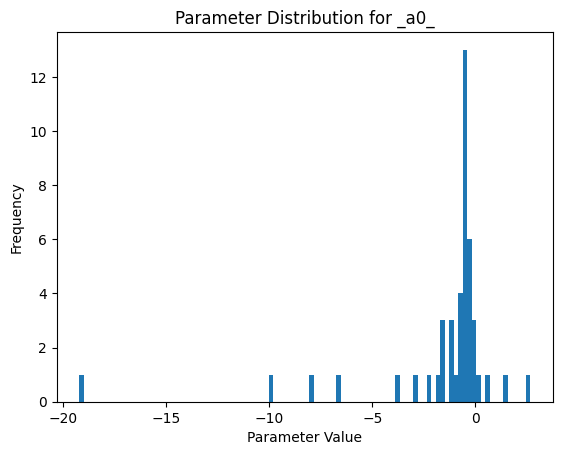

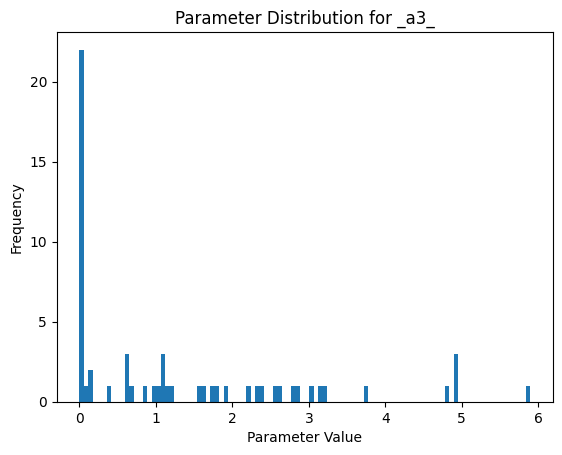

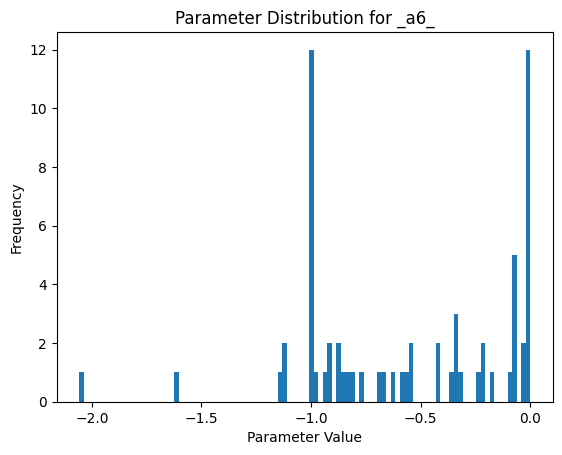

In [7]:
expr = sympify(f'{bms_lin_prod.constraint[0]}{bms_lin_prod}{bms_lin_prod.constraint[1]}')
atomd = dict([(a.name, a) for a in expr.atoms() if a.is_Symbol])
parameters = [atomd[p] for p in bms_lin_prod.parameters if p in list(atomd.keys())]
for i in parameters:
    parameter_collection=[sub_dict[f'{i}'] for sub_dict in bms_lin_prod.par_values.values() ]
    #print(parameter_collection)
    #print(min(parameter_collection),max(parameter_collection))
    param_values = np.array(parameter_collection)
    Q1 = np.percentile(param_values, 25)
    Q3 = np.percentile(param_values, 75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    filtered_values = param_values[(param_values >= lower_bound) & (param_values <= upper_bound)]
    plt.hist(filtered_values, bins=100)
    plt.xlabel("Parameter Value")
    plt.ylabel("Frequency")
    plt.title(f"Parameter Distribution for {i}")
    plt.show()

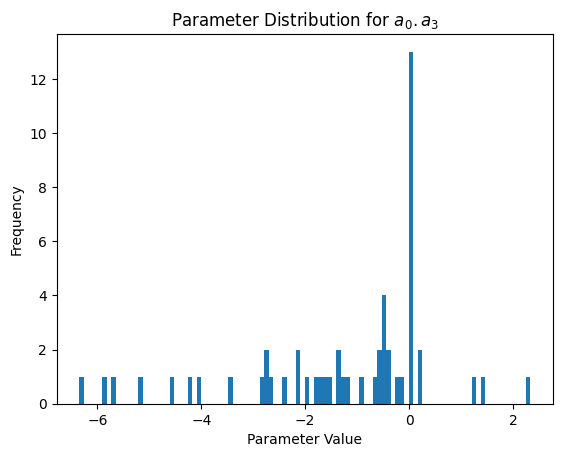

In [8]:
parameter_collection=[sub_dict[f'_a0_']*sub_dict[f'_a3_'] for sub_dict in bms_lin_prod.par_values.values() ]
#print(parameter_collection)
#print(min(parameter_collection),max(parameter_collection))
param_values = np.array(parameter_collection)

Q1 = np.percentile(param_values, 25)
Q3 = np.percentile(param_values, 75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_values = param_values[(param_values >= lower_bound) & (param_values <= upper_bound)]
plt.hist(filtered_values, bins=100)
plt.xlabel("Parameter Value")
plt.ylabel("Frequency")
plt.title(f"Parameter Distribution for $a_0 . a_3$")
plt.show()

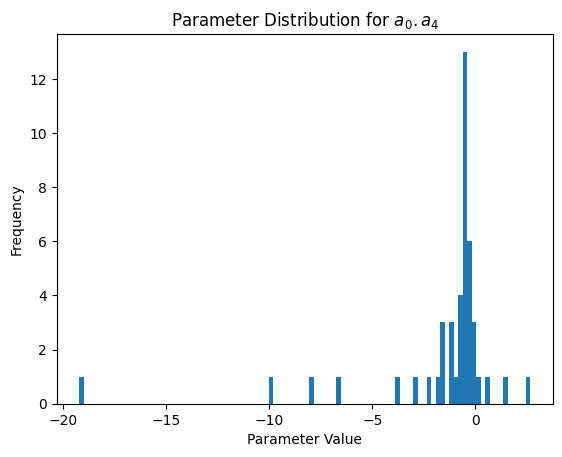

In [9]:
parameter_collection=[sub_dict[f'_a0_']*sub_dict[f'_a4_'] for sub_dict in bms_lin_prod.par_values.values() ]
#print(parameter_collection)
#print(min(parameter_collection),max(parameter_collection))
param_values = np.array(parameter_collection)

Q1 = np.percentile(param_values, 25)
Q3 = np.percentile(param_values, 75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_values = param_values[(param_values >= lower_bound) & (param_values <= upper_bound)]
plt.hist(filtered_values, bins=100)
plt.xlabel("Parameter Value")
plt.ylabel("Frequency")
plt.title(f"Parameter Distribution for $a_0 . a_4$")
plt.show()